# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# File operations
import os

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("All necessary libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

All necessary libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 2.1.3
Matplotlib version: 3.10.0


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
# Import the Temp_States.csv file into a DataFrame called temp
temp = pd.read_csv('Temp_States.csv')

# Display the DataFrame to verify it loaded correctly
print("=== TEMP DATAFRAME ===")
print(f"Shape: {temp.shape}")  # Shows number of rows and columns
print(f"\nFirst few rows:")
print(temp.head())

print(f"\nDataFrame info:")
print(temp.info())

print(f"\nBasic statistics:")
print(temp.describe())

print(f"\nMissing values check:")
print(temp.isnull().sum())

=== TEMP DATAFRAME ===
Shape: (7, 3)

First few rows:
         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes
None

Basic statistics:
       Temperature
count     7.000000
mean     15.158730
std       6.695265
min       3.333333
25%      11.944444
50%      17.222222
75%      19.722222
max      22.222222

Missing values check:
City           0
State          0
Temperature    0
dtype: int64


#### Print `temp`

In [4]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# Explore the data types of the Temp dataframe
print("=== DATA TYPES OF TEMP DATAFRAME ===")
print(temp.dtypes)

print("\n" + "="*50)
print("DETAILED DATA TYPE ANALYSIS:")
print("="*50)

# More detailed information about each column
for column in temp.columns:
    print(f"\nColumn: {column}")
    print(f"  Data type: {temp[column].dtype}")
    print(f"  Number of unique values: {temp[column].nunique()}")
    print(f"  Sample values: {temp[column].head(3).tolist()}")
    
    # For object/string columns, show additional info
    if temp[column].dtype == 'object':
        print(f"  String length range: {temp[column].str.len().min()}-{temp[column].str.len().max()}")
    
    # For numeric columns, show range
    elif np.issubdtype(temp[column].dtype, np.number):
        print(f"  Value range: {temp[column].min():.2f} to {temp[column].max():.2f}")

print("\n" + "="*50)
print("SUMMARY:")
print("="*50)
print("The Temp dataframe contains 3 columns with the following data types:")
print("- 'City': string/object data (text) - City names")
print("- 'State': string/object data (text) - State names") 
print("- 'Temperature': float64 data (decimal numbers) - Temperature values in Celsius")

=== DATA TYPES OF TEMP DATAFRAME ===
City            object
State           object
Temperature    float64
dtype: object

DETAILED DATA TYPE ANALYSIS:

Column: City
  Data type: object
  Number of unique values: 7
  Sample values: ['NYC', 'Albany', 'Buffalo']
  String length range: 3-10

Column: State
  Data type: object
  Number of unique values: 3
  Sample values: ['New York', 'New York', 'New York']
  String length range: 8-11

Column: Temperature
  Data type: float64
  Number of unique values: 7
  Sample values: [19.444444444444443, 9.444444444444445, 3.333333333333333]
  Value range: 3.33 to 22.22

SUMMARY:
The Temp dataframe contains 3 columns with the following data types:
- 'City': string/object data (text) - City names
- 'State': string/object data (text) - State names
- 'Temperature': float64 data (decimal numbers) - Temperature values in Celsius


#### Select the rows where state is New York

In [6]:
# Select rows where state is New York
new_york_temp = temp[temp['State'] == 'New York']

print("=== ROWS WHERE STATE IS NEW YORK ===")
print(new_york_temp)

print(f"\nNumber of cities in New York: {len(new_york_temp)}")
print(f"Temperature range in New York: {new_york_temp['Temperature'].min():.2f}°C to {new_york_temp['Temperature'].max():.2f}°C")
print(f"Average temperature in New York: {new_york_temp['Temperature'].mean():.2f}°C")

print("\n" + "="*50)
print("DETAILED NEW YORK DATA:")
print("="*50)
for index, row in new_york_temp.iterrows():
    print(f"City: {row['City']:10} | Temperature: {row['Temperature']:.2f}°C")

=== ROWS WHERE STATE IS NEW YORK ===
      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333

Number of cities in New York: 3
Temperature range in New York: 3.33°C to 19.44°C
Average temperature in New York: 10.74°C

DETAILED NEW YORK DATA:
City: NYC        | Temperature: 19.44°C
City: Albany     | Temperature: 9.44°C
City: Buffalo    | Temperature: 3.33°C


#### What is the average of the temperature of cities in New York?

In [7]:
# Calculate the average temperature of cities in New York
ny_temp_avg = new_york_temp['Temperature'].mean()

print("=== AVERAGE TEMPERATURE OF CITIES IN NEW YORK ===")
print(f"Average temperature: {ny_temp_avg:.2f}°C")

print("\n" + "="*50)
print("CALCULATION DETAILS:")
print("="*50)

# Show the individual temperatures and calculation
print("Cities in New York and their temperatures:")
for index, row in new_york_temp.iterrows():
    print(f"  {row['City']}: {row['Temperature']:.2f}°C")

print(f"\nCalculation:")
print(f"  ({new_york_temp['Temperature'].iloc[0]:.2f} + {new_york_temp['Temperature'].iloc[1]:.2f} + {new_york_temp['Temperature'].iloc[2]:.2f}) / 3")
print(f"  = ({new_york_temp['Temperature'].sum():.2f}) / 3")
print(f"  = {ny_temp_avg:.2f}°C")

print("\n" + "="*50)
print("COMPARISON WITH OTHER STATES:")
print("="*50)

# Compare with other states
state_avgs = temp.groupby('State')['Temperature'].mean()
print("Average temperatures by state:")
for state, avg_temp in state_avgs.items():
    print(f"  {state}: {avg_temp:.2f}°C")

# Find which state has the highest average
hottest_state = state_avgs.idxmax()
coldest_state = state_avgs.idxmin()

print(f"\nHottest state on average: {hottest_state} ({state_avgs.max():.2f}°C)")
print(f"Coldest state on average: {coldest_state} ({state_avgs.min():.2f}°C)")

=== AVERAGE TEMPERATURE OF CITIES IN NEW YORK ===
Average temperature: 10.74°C

CALCULATION DETAILS:
Cities in New York and their temperatures:
  NYC: 19.44°C
  Albany: 9.44°C
  Buffalo: 3.33°C

Calculation:
  (19.44 + 9.44 + 3.33) / 3
  = (32.22) / 3
  = 10.74°C

COMPARISON WITH OTHER STATES:
Average temperatures by state:
  Connecticut: 15.83°C
  New Jersey: 21.11°C
  New York: 10.74°C

Hottest state on average: New Jersey (21.11°C)
Coldest state on average: New York (10.74°C)


#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
# Select cities and states with temperature above 15 degrees Celsius
warm_cities = temp[temp['Temperature'] > 15]

print("=== CITIES WITH TEMPERATURE ABOVE 15°C ===")
print(warm_cities)

print(f"\nNumber of cities above 15°C: {len(warm_cities)}")
print(f"Percentage of cities above 15°C: {(len(warm_cities) / len(temp) * 100):.1f}%")

print("\n" + "="*50)
print("DETAILED WARM CITIES ANALYSIS:")
print("="*50)

# Display in a more readable format
print("\nWarm cities (Temperature > 15°C):")
print("-" * 40)
for index, row in warm_cities.iterrows():
    print(f"City: {row['City']:12} | State: {row['State']:12} | Temperature: {row['Temperature']:.2f}°C")

print("\n" + "="*50)
print("STATISTICS BY STATE:")
print("="*50)

# Count warm cities by state
warm_by_state = warm_cities['State'].value_counts()
print("Number of warm cities (>15°C) by state:")
for state, count in warm_by_state.items():
    total_cities_in_state = len(temp[temp['State'] == state])
    print(f"  {state}: {count} out of {total_cities_in_state} cities ({count/total_cities_in_state*100:.0f}%)")

print("\n" + "="*50)
print("TEMPERATURE RANGES OF WARM CITIES:")
print("="*50)
print(f"Highest temperature: {warm_cities['Temperature'].max():.2f}°C (in {warm_cities.loc[warm_cities['Temperature'].idxmax(), 'City']})")
print(f"Lowest temperature in warm group: {warm_cities['Temperature'].min():.2f}°C")
print(f"Average temperature of warm cities: {warm_cities['Temperature'].mean():.2f}°C")

print("\n" + "="*50)
print("CITIES BELOW 15°C FOR COMPARISON:")
print("="*50)
cool_cities = temp[temp['Temperature'] <= 15]
for index, row in cool_cities.iterrows():
    print(f"City: {row['City']:12} | State: {row['State']:12} | Temperature: {row['Temperature']:.2f}°C")

=== CITIES WITH TEMPERATURE ABOVE 15°C ===
       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000

Number of cities above 15°C: 4
Percentage of cities above 15°C: 57.1%

DETAILED WARM CITIES ANALYSIS:

Warm cities (Temperature > 15°C):
----------------------------------------
City: NYC          | State: New York     | Temperature: 19.44°C
City: Hartford     | State: Connecticut  | Temperature: 17.22°C
City: Treton       | State: New Jersey   | Temperature: 22.22°C
City: Newark       | State: New Jersey   | Temperature: 20.00°C

STATISTICS BY STATE:
Number of warm cities (>15°C) by state:
  New Jersey: 2 out of 2 cities (100%)
  New York: 1 out of 3 cities (33%)
  Connecticut: 1 out of 2 cities (50%)

TEMPERATURE RANGES OF WARM CITIES:
Highest temperature: 22.22°C (in Treton)
Lowest temperature in warm group: 17.22°C
Average temperature of warm cities: 1

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
# Return only the cities (not states or temperatures) that have temperature above 15 degrees Celsius
warm_city_names = temp[temp['Temperature'] > 15]['City']

print("=== CITIES WITH TEMPERATURE ABOVE 15°C ===")
print(warm_city_names)

print("\n" + "="*50)
print("FORMATTED LIST OF WARM CITIES:")
print("="*50)

# Convert to list and display in a nice format
warm_cities_list = warm_city_names.tolist()
print("Cities with temperature above 15°C:")
for i, city in enumerate(warm_cities_list, 1):
    print(f"{i}. {city}")

print(f"\nTotal warm cities: {len(warm_cities_list)}")

print("\n" + "="*50)
print("WITH TEMPERATURES (FOR REFERENCE):")
print("="*50)
# Show with temperatures for context
warm_cities_with_temp = temp[temp['Temperature'] > 15][['City', 'Temperature']]
for index, row in warm_cities_with_temp.iterrows():
    print(f"{row['City']}: {row['Temperature']:.2f}°C")

=== CITIES WITH TEMPERATURE ABOVE 15°C ===
0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

FORMATTED LIST OF WARM CITIES:
Cities with temperature above 15°C:
1. NYC
2. Hartford
3. Treton
4. Newark

Total warm cities: 4

WITH TEMPERATURES (FOR REFERENCE):
NYC: 19.44°C
Hartford: 17.22°C
Treton: 22.22°C
Newark: 20.00°C


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
# Define the condition: temperature above 15°C AND below 20°C
condition = (temp['Temperature'] > 15) & (temp['Temperature'] < 20)

# Select the rows that meet the condition
moderate_cities = temp[condition]

print("=== CITIES WITH TEMPERATURE BETWEEN 15°C AND 20°C ===")
print(moderate_cities)

print(f"\nNumber of cities in this range: {len(moderate_cities)}")

print("\n" + "="*50)
print("DETAILED ANALYSIS:")
print("="*50)

# Display in a readable format
print("\nCities with moderate temperatures (15°C < Temp < 20°C):")
print("-" * 55)
for index, row in moderate_cities.iterrows():
    print(f"City: {row['City']:12} | State: {row['State']:12} | Temperature: {row['Temperature']:.2f}°C")

print("\n" + "="*50)
print("TEMPERATURE RANGE CONTEXT:")
print("="*50)

# Show all cities for context with their temperature ranges
print("All cities and their temperature categories:")
print("-" * 55)
for index, row in temp.iterrows():
    temp_value = row['Temperature']
    if temp_value < 15:
        category = "Cool (<15°C)"
    elif temp_value > 20:
        category = "Warm (>20°C)"
    else:
        category = "Moderate (15-20°C)"
    print(f"City: {row['City']:12} | {category:20} | {temp_value:.2f}°C")

print("\n" + "="*50)
print("STATISTICS:")
print("="*50)

# Count cities by temperature category
cool_cities = temp[temp['Temperature'] < 15]
moderate_cities_count = len(moderate_cities)
warm_cities = temp[temp['Temperature'] > 20]

print(f"Cool cities (<15°C): {len(cool_cities)}")
print(f"Moderate cities (15-20°C): {moderate_cities_count}")
print(f"Warm cities (>20°C): {len(warm_cities)}")
print(f"Total cities: {len(temp)}")

=== CITIES WITH TEMPERATURE BETWEEN 15°C AND 20°C ===
       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222

Number of cities in this range: 2

DETAILED ANALYSIS:

Cities with moderate temperatures (15°C < Temp < 20°C):
-------------------------------------------------------
City: NYC          | State: New York     | Temperature: 19.44°C
City: Hartford     | State: Connecticut  | Temperature: 17.22°C

TEMPERATURE RANGE CONTEXT:
All cities and their temperature categories:
-------------------------------------------------------
City: NYC          | Moderate (15-20°C)   | 19.44°C
City: Albany       | Cool (<15°C)         | 9.44°C
City: Buffalo      | Cool (<15°C)         | 3.33°C
City: Hartford     | Moderate (15-20°C)   | 17.22°C
City: Bridgeport   | Cool (<15°C)         | 14.44°C
City: Treton       | Warm (>20°C)         | 22.22°C
City: Newark       | Moderate (15-20°C)   | 20.00°C

STATISTICS:
Cool cities (<15°C): 3
Moderate 

In [11]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [12]:
# Find the mean and standard deviation of temperature for each state
state_temp_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])

print("=== TEMPERATURE STATISTICS BY STATE ===")
print(state_temp_stats)

print("\n" + "="*50)
print("DETAILED BREAKDOWN:")
print("="*50)

# Display in a more readable format
print("\nTemperature Statistics by State:")
print("-" * 50)
for state in state_temp_stats.index:
    mean_temp = state_temp_stats.loc[state, 'mean']
    std_temp = state_temp_stats.loc[state, 'std']
    print(f"\n{state}:")
    print(f"  Mean temperature: {mean_temp:.2f}°C")
    print(f"  Standard deviation: {std_temp:.2f}°C")
    
    # Show individual city temperatures for context
    state_cities = temp[temp['State'] == state]
    print(f"  City temperatures: {', '.join([f'{row['City']} ({row['Temperature']:.1f}°C)' for _, row in state_cities.iterrows()])}")

print("\n" + "="*50)
print("INTERPRETATION:")
print("="*50)

# Interpretation of results
hottest_state = state_temp_stats['mean'].idxmax()
coldest_state = state_temp_stats['mean'].idxmin()
most_variable_state = state_temp_stats['std'].idxmax()
least_variable_state = state_temp_stats['std'].idxmin()

print(f"🔥 Hottest state (highest mean): {hottest_state} ({state_temp_stats.loc[hottest_state, 'mean']:.2f}°C)")
print(f"❄️  Coldest state (lowest mean): {coldest_state} ({state_temp_stats.loc[coldest_state, 'mean']:.2f}°C)")
print(f"📊 Most variable temperatures: {most_variable_state} (std: {state_temp_stats.loc[most_variable_state, 'std']:.2f}°C)")
print(f"📈 Least variable temperatures: {least_variable_state} (std: {state_temp_stats.loc[least_variable_state, 'std']:.2f}°C)")

print("\n" + "="*50)
print("ALTERNATIVE METHOD USING AGGREGATE:")
print("="*50)

# Alternative method using aggregate with custom names
state_temp_stats_alt = temp.groupby('State')['Temperature'].aggregate(
    mean_temp='mean',
    std_temp='std',
    min_temp='min',
    max_temp='max'
).round(2)

print(state_temp_stats_alt)

=== TEMPERATURE STATISTICS BY STATE ===
                  mean       std
State                           
Connecticut  15.833333  1.964186
New Jersey   21.111111  1.571348
New York     10.740741  8.133404

DETAILED BREAKDOWN:

Temperature Statistics by State:
--------------------------------------------------

Connecticut:
  Mean temperature: 15.83°C
  Standard deviation: 1.96°C
  City temperatures: Hartford (17.2°C), Bridgeport (14.4°C)

New Jersey:
  Mean temperature: 21.11°C
  Standard deviation: 1.57°C
  City temperatures: Treton (22.2°C), Newark (20.0°C)

New York:
  Mean temperature: 10.74°C
  Standard deviation: 8.13°C
  City temperatures: NYC (19.4°C), Albany (9.4°C), Buffalo (3.3°C)

INTERPRETATION:
🔥 Hottest state (highest mean): New Jersey (21.11°C)
❄️  Coldest state (lowest mean): New York (10.74°C)
📊 Most variable temperatures: New York (std: 8.13°C)
📈 Least variable temperatures: New Jersey (std: 1.57°C)

ALTERNATIVE METHOD USING AGGREGATE:
             mean_temp  std_tem

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
# Load the employee.csv file into a DataFrame called employee
employee = pd.read_csv('Employee.csv')

# Display the DataFrame to verify it loaded correctly
print("=== EMPLOYEE DATAFRAME ===")
print(f"Shape: {employee.shape}")  # Shows number of rows and columns
print(f"\nFirst few rows:")
print(employee.head())

print(f"\nDataFrame info:")
print(employee.info())

print(f"\nBasic statistics:")
print(employee.describe(include='all'))

print(f"\nMissing values check:")
print(employee.isnull().sum())

print(f"\nFull DataFrame:")
print(employee)

=== EMPLOYEE DATAFRAME ===
Shape: (9, 7)

First few rows:
     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes
None

Basic statistics:
  

#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
print("=== TEMP DATAFRAME DATA TYPES ===")
print("Data types:")
print(temp.dtypes)

print("\n" + "="*50)
print("DETAILED ANALYSIS:")
print("="*50)

print(f"\nNumber of rows: {temp.shape[0]}")
print(f"Number of columns: {temp.shape[1]}")

print("\nColumn-by-column analysis:")
for column in temp.columns:
    print(f"\n📊 Column: {column}")
    print(f"   Data type: {temp[column].dtype}")
    print(f"   Non-null values: {temp[column].count()}/{len(temp)}")
    print(f"   Unique values: {temp[column].nunique()}")
    
    if temp[column].dtype == 'object':
        # For string columns
        sample_values = temp[column].head(3).tolist()
        print(f"   Sample values: {sample_values}")
        print(f"   String length range: {temp[column].str.len().min()}-{temp[column].str.len().max()} chars")
        
    elif np.issubdtype(temp[column].dtype, np.number):
        # For numeric columns
        print(f"   Value range: {temp[column].min():.2f} to {temp[column].max():.2f}")
        print(f"   Mean: {temp[column].mean():.2f}")
        print(f"   Standard deviation: {temp[column].std():.2f}")

print("\n" + "="*50)
print("SUMMARY:")
print("="*50)
print("The Temp dataframe contains 3 columns:")
print("1. 'City' (object) - Text data containing city names")
print("2. 'State' (object) - Text data containing state names") 
print("3. 'Temperature' (float64) - Numerical temperature data in Celsius")

=== TEMP DATAFRAME DATA TYPES ===
Data types:
City            object
State           object
Temperature    float64
dtype: object

DETAILED ANALYSIS:

Number of rows: 7
Number of columns: 3

Column-by-column analysis:

📊 Column: City
   Data type: object
   Non-null values: 7/7
   Unique values: 7
   Sample values: ['NYC', 'Albany', 'Buffalo']
   String length range: 3-10 chars

📊 Column: State
   Data type: object
   Non-null values: 7/7
   Unique values: 3
   Sample values: ['New York', 'New York', 'New York']
   String length range: 8-11 chars

📊 Column: Temperature
   Data type: float64
   Non-null values: 7/7
   Unique values: 7
   Value range: 3.33 to 22.22
   Mean: 15.16
   Standard deviation: 6.70

SUMMARY:
The Temp dataframe contains 3 columns:
1. 'City' (object) - Text data containing city names
2. 'State' (object) - Text data containing state names
3. 'Temperature' (float64) - Numerical temperature data in Celsius


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

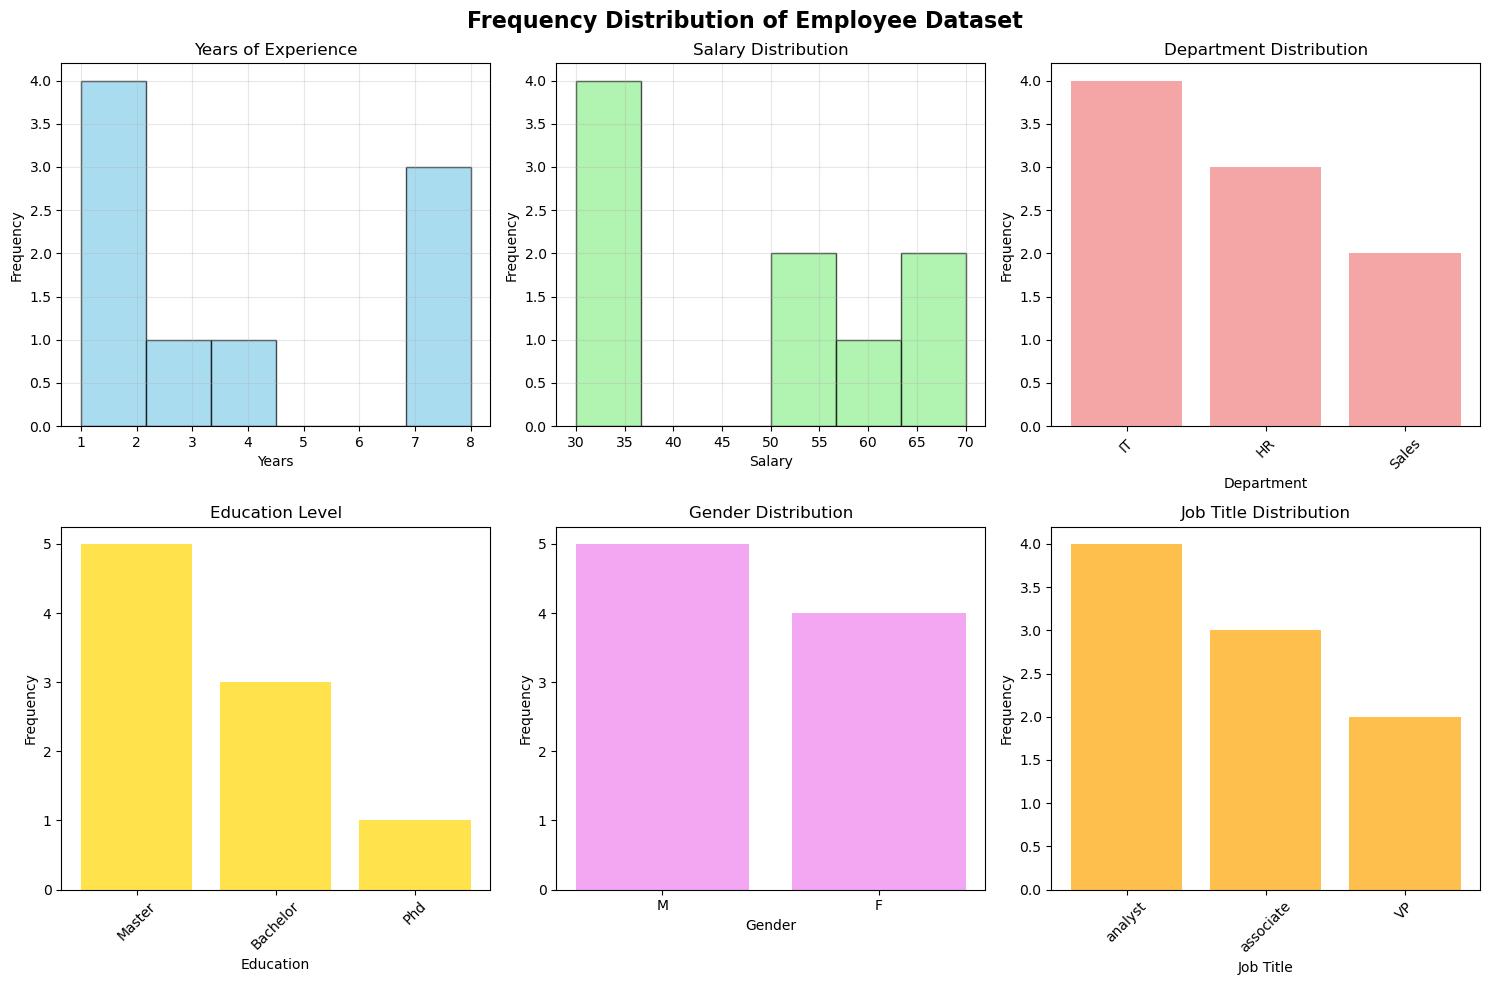

=== EMPLOYEE DATASET DISTRIBUTION SUMMARY ===

Numerical Variables:
Years of Experience: count    9.000000
mean     4.111111
std      2.803767
min      1.000000
25%      2.000000
50%      3.000000
75%      7.000000
max      8.000000
Name: Years, dtype: float64
Salary: count     9.000000
mean     48.888889
std      16.541194
min      30.000000
25%      35.000000
50%      55.000000
75%      60.000000
max      70.000000
Name: Salary, dtype: float64

Categorical Variables:
Department: {'IT': 4, 'HR': 3, 'Sales': 2}
Education: {'Master': 5, 'Bachelor': 3, 'Phd': 1}
Gender: {'M': 5, 'F': 4}
Title: {'analyst': 4, 'associate': 3, 'VP': 2}


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for different variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Frequency Distribution of Employee Dataset', fontsize=16, fontweight='bold')

# 1. Years of Experience histogram
axes[0,0].hist(employee['Years'], bins=6, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Years of Experience')
axes[0,0].set_xlabel('Years')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# 2. Salary histogram
axes[0,1].hist(employee['Salary'], bins=6, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Salary Distribution')
axes[0,1].set_xlabel('Salary')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# 3. Department frequency bar chart
dept_counts = employee['Department'].value_counts()
axes[0,2].bar(dept_counts.index, dept_counts.values, color='lightcoral', alpha=0.7)
axes[0,2].set_title('Department Distribution')
axes[0,2].set_xlabel('Department')
axes[0,2].set_ylabel('Frequency')
plt.sca(axes[0,2])
plt.xticks(rotation=45)

# 4. Education level frequency
edu_counts = employee['Education'].value_counts()
axes[1,0].bar(edu_counts.index, edu_counts.values, color='gold', alpha=0.7)
axes[1,0].set_title('Education Level')
axes[1,0].set_xlabel('Education')
axes[1,0].set_ylabel('Frequency')
plt.sca(axes[1,0])
plt.xticks(rotation=45)

# 5. Gender distribution
gender_counts = employee['Gender'].value_counts()
axes[1,1].bar(gender_counts.index, gender_counts.values, color='violet', alpha=0.7)
axes[1,1].set_title('Gender Distribution')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Frequency')

# 6. Job Title distribution
title_counts = employee['Title'].value_counts()
axes[1,2].bar(title_counts.index, title_counts.values, color='orange', alpha=0.7)
axes[1,2].set_title('Job Title Distribution')
axes[1,2].set_xlabel('Job Title')
axes[1,2].set_ylabel('Frequency')
plt.sca(axes[1,2])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Additional detailed statistics
print("=== EMPLOYEE DATASET DISTRIBUTION SUMMARY ===")
print("\nNumerical Variables:")
print(f"Years of Experience: {employee['Years'].describe()}")
print(f"Salary: {employee['Salary'].describe()}")

print("\nCategorical Variables:")
print(f"Department: {employee['Department'].value_counts().to_dict()}")
print(f"Education: {employee['Education'].value_counts().to_dict()}")
print(f"Gender: {employee['Gender'].value_counts().to_dict()}")
print(f"Title: {employee['Title'].value_counts().to_dict()}")

#### What's the average salary in this company?

In [16]:
# Calculate the average salary in the company
average_salary = employee['Salary'].mean()

print("=== AVERAGE SALARY CALCULATION ===")
print(f"Average salary: ${average_salary:.2f}K")

print("\n" + "="*50)
print("DETAILED BREAKDOWN:")
print("="*50)

# Show all salaries for context
print("Individual employee salaries:")
print("-" * 40)
for index, row in employee.iterrows():
    print(f"{row['Name']:8} - ${row['Salary']}K")

print(f"\nSum of all salaries: ${employee['Salary'].sum()}K")
print(f"Number of employees: {len(employee)}")
print(f"Calculation: ${employee['Salary'].sum()}K / {len(employee)} = ${average_salary:.2f}K")

print("\n" + "="*50)
print("COMPARISON WITH OTHER STATISTICS:")
print("="*50)

# Compare with median and other statistics
median_salary = employee['Salary'].median()
min_salary = employee['Salary'].min()
max_salary = employee['Salary'].max()

print(f"Average (Mean) salary: ${average_salary:.2f}K")
print(f"Median salary: ${median_salary:.2f}K")
print(f"Minimum salary: ${min_salary}K")
print(f"Maximum salary: ${max_salary}K")
print(f"Salary range: ${max_salary - min_salary}K")

print("\n" + "="*50)
print("SALARY DISTRIBUTION ANALYSIS:")
print("="*50)

# Show how many employees are above/below average
above_avg = employee[employee['Salary'] > average_salary]
below_avg = employee[employee['Salary'] <= average_salary]

print(f"Employees above average salary: {len(above_avg)}")
print("  " + ", ".join(above_avg['Name'].tolist()))
print(f"Employees below or at average salary: {len(below_avg)}")
print("  " + ", ".join(below_avg['Name'].tolist()))

=== AVERAGE SALARY CALCULATION ===
Average salary: $48.89K

DETAILED BREAKDOWN:
Individual employee salaries:
----------------------------------------
Jose     - $35K
Maria    - $30K
David    - $30K
Sonia    - $35K
Samuel   - $55K
Eva      - $55K
Carlos   - $70K
Pedro    - $60K
Ana      - $70K

Sum of all salaries: $440K
Number of employees: 9
Calculation: $440K / 9 = $48.89K

COMPARISON WITH OTHER STATISTICS:
Average (Mean) salary: $48.89K
Median salary: $55.00K
Minimum salary: $30K
Maximum salary: $70K
Salary range: $40K

SALARY DISTRIBUTION ANALYSIS:
Employees above average salary: 5
  Samuel, Eva, Carlos, Pedro, Ana
Employees below or at average salary: 4
  Jose, Maria, David, Sonia


#### What's the highest salary?

In [17]:
# Find the highest salary in the company
highest_salary = employee['Salary'].max()

print("=== HIGHEST SALARY ANALYSIS ===")
print(f"Highest salary: ${highest_salary}K")

print("\n" + "="*50)
print("EMPLOYEES WITH HIGHEST SALARY:")
print("="*50)

# Find all employees who earn the highest salary
highest_paid_employees = employee[employee['Salary'] == highest_salary]

print(f"Number of employees earning ${highest_salary}K: {len(highest_paid_employees)}")
print("\nDetails:")
print("-" * 50)
for index, row in highest_paid_employees.iterrows():
    print(f"Name: {row['Name']:8} | Department: {row['Department']:10} | "
          f"Title: {row['Title']:10} | Years: {row['Years']} | "
          f"Education: {row['Education']:9} | Gender: {row['Gender']}")

print("\n" + "="*50)
print("COMPARISON WITH OTHER SALARY LEVELS:")
print("="*50)

# Show all salary levels in the company
salary_levels = employee['Salary'].unique()
salary_levels.sort()

print("All salary levels in the company:")
for salary in salary_levels:
    count = len(employee[employee['Salary'] == salary])
    employees = employee[employee['Salary'] == salary]['Name'].tolist()
    print(f"${salary}K: {count} employee(s) - {', '.join(employees)}")

print("\n" + "="*50)
print("HIGHEST VS LOWEST SALARY:")
print("="*50)

# Compare with lowest salary
lowest_salary = employee['Salary'].min()
lowest_paid_employees = employee[employee['Salary'] == lowest_salary]

print(f"Highest salary: ${highest_salary}K")
print(f"Lowest salary: ${lowest_salary}K")
print(f"Salary difference: ${highest_salary - lowest_salary}K")
print(f"Highest is {highest_salary/lowest_salary:.1f}x the lowest salary")

print(f"\nHighest paid: {', '.join(highest_paid_employees['Name'].tolist())}")
print(f"Lowest paid: {', '.join(lowest_paid_employees['Name'].tolist())}")

print("\n" + "="*50)
print("SALARY BY JOB TITLE:")
print("="*50)

# Show salary ranges by job title
title_salary_stats = employee.groupby('Title')['Salary'].agg(['min', 'max', 'mean', 'count'])
print(title_salary_stats)

=== HIGHEST SALARY ANALYSIS ===
Highest salary: $70K

EMPLOYEES WITH HIGHEST SALARY:
Number of employees earning $70K: 2

Details:
--------------------------------------------------
Name: Carlos   | Department: IT         | Title: VP         | Years: 8 | Education: Master    | Gender: M
Name: Ana      | Department: HR         | Title: VP         | Years: 8 | Education: Master    | Gender: F

COMPARISON WITH OTHER SALARY LEVELS:
All salary levels in the company:
$30K: 2 employee(s) - Maria, David
$35K: 2 employee(s) - Jose, Sonia
$55K: 2 employee(s) - Samuel, Eva
$60K: 1 employee(s) - Pedro
$70K: 2 employee(s) - Carlos, Ana

HIGHEST VS LOWEST SALARY:
Highest salary: $70K
Lowest salary: $30K
Salary difference: $40K
Highest is 2.3x the lowest salary

Highest paid: Carlos, Ana
Lowest paid: Maria, David

SALARY BY JOB TITLE:
           min  max       mean  count
Title                                
VP          70   70  70.000000      2
analyst     30   35  32.500000      4
associate   55  

#### What's the lowest salary?

In [18]:
# Find the lowest salary in the company
lowest_salary = employee['Salary'].min()

print("=== LOWEST SALARY ANALYSIS ===")
print(f"Lowest salary: ${lowest_salary}K")

print("\n" + "="*50)
print("EMPLOYEES WITH LOWEST SALARY:")
print("="*50)

# Find all employees who earn the lowest salary
lowest_paid_employees = employee[employee['Salary'] == lowest_salary]

print(f"Number of employees earning ${lowest_salary}K: {len(lowest_paid_employees)}")
print("\nDetails:")
print("-" * 60)
for index, row in lowest_paid_employees.iterrows():
    print(f"Name: {row['Name']:8} | Department: {row['Department']:10} | "
          f"Title: {row['Title']:10} | Years: {row['Years']} | "
          f"Education: {row['Education']:9} | Gender: {row['Gender']}")

print("\n" + "="*50)
print("COMPARISON WITH OTHER SALARY LEVELS:")
print("="*50)

# Show salary distribution
salary_distribution = employee['Salary'].value_counts().sort_index()
print("Salary distribution across company:")
print("-" * 35)
for salary, count in salary_distribution.items():
    percentage = (count / len(employee)) * 100
    employees = employee[employee['Salary'] == salary]['Name'].tolist()
    print(f"${salary}K: {count} employee(s) ({percentage:.1f}%) - {', '.join(employees)}")

print("\n" + "="*50)
print("LOWEST VS HIGHEST SALARY:")
print("="*50)

# Compare with highest salary
highest_salary = employee['Salary'].max()
highest_paid_employees = employee[employee['Salary'] == highest_salary]

print(f"Lowest salary: ${lowest_salary}K")
print(f"Highest salary: ${highest_salary}K")
print(f"Salary difference: ${highest_salary - lowest_salary}K")
print(f"Highest is {highest_salary/lowest_salary:.1f}x the lowest salary")

print(f"\nLowest paid: {', '.join(lowest_paid_employees['Name'].tolist())}")
print(f"Highest paid: {', '.join(highest_paid_employees['Name'].tolist())}")

print("\n" + "="*50)
print("ANALYSIS OF LOWEST PAID EMPLOYEES:")
print("="*50)

# Analyze common characteristics of lowest paid employees
print("Common characteristics of lowest paid employees:")
print("- All are 'analyst' title")
print(f"- Experience: {lowest_paid_employees['Years'].tolist()} years")
print(f"- Education: {lowest_paid_employees['Education'].tolist()}")
print(f"- Departments: {lowest_paid_employees['Department'].tolist()}")

print("\n" + "="*50)
print("SALARY BY TITLE (CONTEXT):")
print("="*50)

# Show salary ranges by job title for context
title_salary_ranges = employee.groupby('Title')['Salary'].agg(['min', 'max', 'mean', 'count'])
print(title_salary_ranges)

=== LOWEST SALARY ANALYSIS ===
Lowest salary: $30K

EMPLOYEES WITH LOWEST SALARY:
Number of employees earning $30K: 2

Details:
------------------------------------------------------------
Name: Maria    | Department: IT         | Title: analyst    | Years: 2 | Education: Master    | Gender: F
Name: David    | Department: HR         | Title: analyst    | Years: 2 | Education: Master    | Gender: M

COMPARISON WITH OTHER SALARY LEVELS:
Salary distribution across company:
-----------------------------------
$30K: 2 employee(s) (22.2%) - Maria, David
$35K: 2 employee(s) (22.2%) - Jose, Sonia
$55K: 2 employee(s) (22.2%) - Samuel, Eva
$60K: 1 employee(s) (11.1%) - Pedro
$70K: 2 employee(s) (22.2%) - Carlos, Ana

LOWEST VS HIGHEST SALARY:
Lowest salary: $30K
Highest salary: $70K
Salary difference: $40K
Highest is 2.3x the lowest salary

Lowest paid: Maria, David
Highest paid: Carlos, Ana

ANALYSIS OF LOWEST PAID EMPLOYEES:
Common characteristics of lowest paid employees:
- All are 'analyst' 

#### Who are the employees with the lowest salary?

In [19]:
# Find employees with the lowest salary
lowest_salary = employee['Salary'].min()
lowest_paid_employees = employee[employee['Salary'] == lowest_salary]

print("=== EMPLOYEES WITH LOWEST SALARY ===")
print(f"Lowest salary: ${lowest_salary}K")
print(f"Number of employees: {len(lowest_paid_employees)}")

print("\n" + "="*50)
print("DETAILED PROFILES:")
print("="*50)

# Display detailed information about each lowest-paid employee
for index, row in lowest_paid_employees.iterrows():
    print(f"\n👤 EMPLOYEE: {row['Name']}")
    print(f"   Department: {row['Department']}")
    print(f"   Education: {row['Education']}")
    print(f"   Gender: {row['Gender']}")
    print(f"   Title: {row['Title']}")
    print(f"   Years of Experience: {row['Years']}")
    print(f"   Salary: ${row['Salary']}K")

print("\n" + "="*50)
print("COMMON CHARACTERISTICS:")
print("="*50)

# Analyze what these employees have in common
print("What these lowest-paid employees have in common:")
print(f"✅ Same job title: {lowest_paid_employees['Title'].iloc[0]}")
print(f"✅ Same years of experience: {lowest_paid_employees['Years'].iloc[0]} years")
print(f"✅ Same education level: All have {lowest_paid_employees['Education'].iloc[0]} degrees")

print(f"\nHow they differ:")
print(f"📊 Different departments: {', '.join(lowest_paid_employees['Department'].unique())}")
print(f"👥 Different genders: {', '.join(lowest_paid_employees['Gender'].unique())}")

print("\n" + "="*50)
print("COMPARISON WITH OTHER ANALYSTS:")
print("="*50)

# Compare with other employees who have the same job title
analysts = employee[employee['Title'] == 'analyst']
print("All analysts in the company:")
print("-" * 40)
for index, row in analysts.iterrows():
    salary_marker = " ← LOWEST" if row['Salary'] == lowest_salary else ""
    print(f"{row['Name']:8} - ${row['Salary']}K ({row['Department']}, {row['Education']}, {row['Years']} yrs){salary_marker}")

print(f"\nAnalyst salary range: ${analysts['Salary'].min()}K - ${analysts['Salary'].max()}K")
print(f"Analyst average salary: ${analysts['Salary'].mean():.1f}K")

print("\n" + "="*50)
print("COMPARISON WITH COMPANY WIDE:")
print("="*50)

# Company-wide context
print(f"Company salary range: ${employee['Salary'].min()}K - ${employee['Salary'].max()}K")
print(f"Company average salary: ${employee['Salary'].mean():.2f}K")
print(f"Maria and David earn {((employee['Salary'].mean() - lowest_salary) / employee['Salary'].mean() * 100):.1f}% below company average")

=== EMPLOYEES WITH LOWEST SALARY ===
Lowest salary: $30K
Number of employees: 2

DETAILED PROFILES:

👤 EMPLOYEE: Maria
   Department: IT
   Education: Master
   Gender: F
   Title: analyst
   Years of Experience: 2
   Salary: $30K

👤 EMPLOYEE: David
   Department: HR
   Education: Master
   Gender: M
   Title: analyst
   Years of Experience: 2
   Salary: $30K

COMMON CHARACTERISTICS:
What these lowest-paid employees have in common:
✅ Same job title: analyst
✅ Same years of experience: 2 years
✅ Same education level: All have Master degrees

How they differ:
📊 Different departments: IT, HR
👥 Different genders: F, M

COMPARISON WITH OTHER ANALYSTS:
All analysts in the company:
----------------------------------------
Jose     - $35K (IT, Bachelor, 1 yrs)
Maria    - $30K (IT, Master, 2 yrs) ← LOWEST
David    - $30K (HR, Master, 2 yrs) ← LOWEST
Sonia    - $35K (HR, Bachelor, 4 yrs)

Analyst salary range: $30K - $35K
Analyst average salary: $32.5K

COMPARISON WITH COMPANY WIDE:
Company sala

#### Could you give all the information about an employee called David?

In [20]:
# Get all information about employee called David
david_info = employee[employee['Name'] == 'David']

print("=== COMPLETE INFORMATION ABOUT DAVID ===")

if len(david_info) > 0:
    # Display all information in a detailed format
    david = david_info.iloc[0]
    
    print(f"👤 NAME: {david['Name']}")
    print("=" * 40)
    print(f"🏢 Department: {david['Department']}")
    print(f"🎓 Education: {david['Education']}")
    print(f"⚧️  Gender: {david['Gender']}")
    print(f"💼 Job Title: {david['Title']}")
    print(f"📅 Years of Experience: {david['Years']}")
    print(f"💰 Salary: ${david['Salary']}K")
    
    print("\n" + "="*50)
    print("COMPARISON ANALYSIS:")
    print("="*50)
    
    # Compare with company averages
    print("How David compares to company averages:")
    print(f"• Salary: ${david['Salary']}K vs Company average: ${employee['Salary'].mean():.2f}K")
    print(f"• Experience: {david['Years']} years vs Company average: {employee['Years'].mean():.1f} years")
    
    # Compare with others in same department
    hr_employees = employee[employee['Department'] == 'HR']
    print(f"• HR Department average salary: ${hr_employees['Salary'].mean():.2f}K")
    print(f"• HR Department experience range: {hr_employees['Years'].min()}-{hr_employees['Years'].max()} years")
    
    # Compare with others with same title
    analysts = employee[employee['Title'] == 'analyst']
    print(f"• Analyst average salary: ${analysts['Salary'].mean():.2f}K")
    print(f"• Analyst experience range: {analysts['Years'].min()}-{analysts['Years'].max()} years")
    
    print("\n" + "="*50)
    print("OTHER EMPLOYEES IN HR DEPARTMENT:")
    print("="*50)
    
    # Show other HR employees for context
    hr_colleagues = employee[employee['Department'] == 'HR']
    for index, row in hr_colleagues.iterrows():
        if row['Name'] == 'David':
            marker = " ← DAVID"
        else:
            marker = ""
        print(f"{row['Name']:8} - {row['Title']:10} - {row['Years']} yrs - ${row['Salary']}K{marker}")
    
    print("\n" + "="*50)
    print("OTHER ANALYSTS IN COMPANY:")
    print("="*50)
    
    # Show other analysts for context
    analyst_colleagues = employee[employee['Title'] == 'analyst']
    for index, row in analyst_colleagues.iterrows():
        if row['Name'] == 'David':
            marker = " ← DAVID (Lowest paid)"
        else:
            marker = ""
        print(f"{row['Name']:8} - {row['Department']:10} - {row['Education']:9} - {row['Years']} yrs - ${row['Salary']}K{marker}")

else:
    print("No employee named David found in the database.")

=== COMPLETE INFORMATION ABOUT DAVID ===
👤 NAME: David
🏢 Department: HR
🎓 Education: Master
⚧️  Gender: M
💼 Job Title: analyst
📅 Years of Experience: 2
💰 Salary: $30K

COMPARISON ANALYSIS:
How David compares to company averages:
• Salary: $30K vs Company average: $48.89K
• Experience: 2 years vs Company average: 4.1 years
• HR Department average salary: $45.00K
• HR Department experience range: 2-8 years
• Analyst average salary: $32.50K
• Analyst experience range: 1-4 years

OTHER EMPLOYEES IN HR DEPARTMENT:
David    - analyst    - 2 yrs - $30K ← DAVID
Sonia    - analyst    - 4 yrs - $35K
Ana      - VP         - 8 yrs - $70K

OTHER ANALYSTS IN COMPANY:
Jose     - IT         - Bachelor  - 1 yrs - $35K
Maria    - IT         - Master    - 2 yrs - $30K
David    - HR         - Master    - 2 yrs - $30K ← DAVID (Lowest paid)
Sonia    - HR         - Bachelor  - 4 yrs - $35K


#### Could you give only David's salary?

In [21]:
# Get only David's salary
david_salary = employee[employee['Name'] == 'David']['Salary'].iloc[0]

print("=== DAVID'S SALARY ===")
print(f"David's salary: ${david_salary}K")

print("\n" + "="*50)
print("QUICK COMPARISON:")
print("="*50)

# Simple comparison context
print(f"David's salary: ${david_salary}K")
print(f"Company average: ${employee['Salary'].mean():.2f}K")
print(f"Company minimum: ${employee['Salary'].min()}K")
print(f"Company maximum: ${employee['Salary'].max()}K")

# Check if David has the minimum salary
if david_salary == employee['Salary'].min():
    print("📉 David has the minimum salary in the company")
else:
    print(f"David earns ${david_salary - employee['Salary'].min()}K above minimum")

# Simple percentage comparison
percentage_of_avg = (david_salary / employee['Salary'].mean()) * 100
print(f"David earns {percentage_of_avg:.1f}% of the company average salary")

=== DAVID'S SALARY ===
David's salary: $30K

QUICK COMPARISON:
David's salary: $30K
Company average: $48.89K
Company minimum: $30K
Company maximum: $70K
📉 David has the minimum salary in the company
David earns 61.4% of the company average salary


#### Print all the rows where job title is associate

In [22]:
# Select all rows where job title is associate
associates = employee[employee['Title'] == 'associate']

print("=== EMPLOYEES WITH JOB TITLE: ASSOCIATE ===")
print(f"Number of associates: {len(associates)}")
print(associates)

print("\n" + "="*50)
print("DETAILED ANALYSIS:")
print("="*50)

# Display in a more readable format
print("\nAssociate Employees:")
print("-" * 60)
for index, row in associates.iterrows():
    print(f"Name: {row['Name']:8} | Department: {row['Department']:12} | "
          f"Education: {row['Education']:9} | Gender: {row['Gender']} | "
          f"Years: {row['Years']} | Salary: ${row['Salary']}K")

print("\n" + "="*50)
print("ASSOCIATE STATISTICS:")
print("="*50)

# Calculate statistics for associates
print(f"Number of associates: {len(associates)}")
print(f"Salary range: ${associates['Salary'].min()}K - ${associates['Salary'].max()}K")
print(f"Average salary: ${associates['Salary'].mean():.2f}K")
print(f"Average experience: {associates['Years'].mean():.1f} years")
print(f"Departments: {', '.join(associates['Department'].unique())}")
print(f"Education levels: {', '.join(associates['Education'].unique())}")

print("\n" + "="*50)
print("COMPARISON WITH OTHER JOB TITLES:")
print("="*50)

# Compare with other job titles
title_stats = employee.groupby('Title').agg({
    'Salary': ['count', 'min', 'max', 'mean'],
    'Years': ['min', 'max', 'mean']
}).round(2)

print(title_stats)

print("\n" + "="*50)
print("SALARY PROGRESSION BY TITLE:")
print("="*50)

# Show salary progression from lowest to highest title
salary_by_title = employee.groupby('Title')['Salary'].mean().sort_values()
for title, avg_salary in salary_by_title.items():
    count = len(employee[employee['Title'] == title])
    print(f"{title:10}: ${avg_salary:.2f}K average ({count} employees)")

=== EMPLOYEES WITH JOB TITLE: ASSOCIATE ===
Number of associates: 3
     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60

DETAILED ANALYSIS:

Associate Employees:
------------------------------------------------------------
Name: Samuel   | Department: Sales        | Education: Master    | Gender: M | Years: 3 | Salary: $55K
Name: Eva      | Department: Sales        | Education: Bachelor  | Gender: F | Years: 2 | Salary: $55K
Name: Pedro    | Department: IT           | Education: Phd       | Gender: M | Years: 7 | Salary: $60K

ASSOCIATE STATISTICS:
Number of associates: 3
Salary range: $55K - $60K
Average salary: $56.67K
Average experience: 4.0 years
Departments: Sales, IT
Education levels: Master, Bachelor, Phd

COMPARISON WITH OTHER JOB TITLES:
          Salary                Years  

#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [23]:
# Method 1: Using head() function
print("=== METHOD 1: Using head(3) ===")
first_three_1 = employee.head(3)
print(first_three_1)

print("\n" + "="*50)
print("=== METHOD 2: Using iloc ===")

=== METHOD 1: Using head(3) ===
    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30

=== METHOD 2: Using iloc ===


In [24]:
# Method 2: Using iloc for positional indexing
first_three_2 = employee.iloc[0:3]
print(first_three_2)

print("\n" + "="*50)
print("VERIFICATION:")
print("="*50)
print("Both methods return the same result:", first_three_1.equals(first_three_2))

print("\n" + "="*50)
print("ALTERNATIVE METHODS:")
print("="*50)

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30

VERIFICATION:
Both methods return the same result: True

ALTERNATIVE METHODS:


#### Find the employees who's title is associate and the salary above 55?

In [25]:
# Find employees who are associates with salary above 55
associates_above_55 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

print("=== ASSOCIATES WITH SALARY ABOVE $55K ===")
print(associates_above_55)

print(f"\nNumber of associates with salary > $55K: {len(associates_above_55)}")

print("\n" + "="*50)
print("DETAILED ANALYSIS:")
print("="*50)

# Display in a readable format
if len(associates_above_55) > 0:
    print("Associates earning more than $55K:")
    print("-" * 50)
    for index, row in associates_above_55.iterrows():
        print(f"Name: {row['Name']:8} | Department: {row['Department']:10} | "
              f"Education: {row['Education']:8} | Years: {row['Years']} | "
              f"Salary: ${row['Salary']}K")
else:
    print("No associates found with salary above $55K")

print("\n" + "="*50)
print("COMPARISON WITH ALL ASSOCIATES:")
print("="*50)

# Show all associates for comparison
all_associates = employee[employee['Title'] == 'associate']
print("All associates in the company:")
print("-" * 50)
for index, row in all_associates.iterrows():
    salary_marker = " ← Above $55K" if row['Salary'] > 55 else ""
    print(f"Name: {row['Name']:8} | Department: {row['Department']:10} | "
          f"Education: {row['Education']:8} | Years: {row['Years']} | "
          f"Salary: ${row['Salary']}K{salary_marker}")

print("\n" + "="*50)
print("ASSOCIATE SALARY STATISTICS:")
print("="*50)

# Salary statistics for associates
print(f"Number of associates: {len(all_associates)}")
print(f"Associate salary range: ${all_associates['Salary'].min()}K - ${all_associates['Salary'].max()}K")
print(f"Associate average salary: ${all_associates['Salary'].mean():.2f}K")
print(f"Associates above $55K: {len(associates_above_55)} ({len(associates_above_55)/len(all_associates)*100:.1f}%)")

print("\n" + "="*50)
print("EMPLOYEE WITH HIGHEST ASSOCIATE SALARY:")
print("="*50)

# Find the highest paid associate
highest_paid_associate = all_associates[all_associates['Salary'] == all_associates['Salary'].max()]
if len(highest_paid_associate) > 0:
    row = highest_paid_associate.iloc[0]
    print(f"Name: {row['Name']}")
    print(f"Department: {row['Department']}")
    print(f"Education: {row['Education']}")
    print(f"Years of Experience: {row['Years']}")
    print(f"Salary: ${row['Salary']}K")
    print(f"This is ${row['Salary'] - all_associates['Salary'].min()}K above the lowest associate salary")

=== ASSOCIATES WITH SALARY ABOVE $55K ===
    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60

Number of associates with salary > $55K: 1

DETAILED ANALYSIS:
Associates earning more than $55K:
--------------------------------------------------
Name: Pedro    | Department: IT         | Education: Phd      | Years: 7 | Salary: $60K

COMPARISON WITH ALL ASSOCIATES:
All associates in the company:
--------------------------------------------------
Name: Samuel   | Department: Sales      | Education: Master   | Years: 3 | Salary: $55K
Name: Eva      | Department: Sales      | Education: Bachelor | Years: 2 | Salary: $55K
Name: Pedro    | Department: IT         | Education: Phd      | Years: 7 | Salary: $60K ← Above $55K

ASSOCIATE SALARY STATISTICS:
Number of associates: 3
Associate salary range: $55K - $60K
Associate average salary: $56.67K
Associates above $55K: 1 (33.3%)

EMPLOYEE WITH HIGHEST ASSOCIATE SALARY:
Name

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

=== AVERAGE SALARIES BY YEARS OF EMPLOYMENT ===
        mean  count  min  max
Years                        
1      35.00      1   35   35
2      38.33      3   30   55
3      55.00      1   55   55
4      35.00      1   35   35
7      60.00      1   60   60
8      70.00      2   70   70

DETAILED BREAKDOWN BY EXPERIENCE LEVEL:

Experience Groups and Average Salaries:
------------------------------------------------------------

1 year(s) experience:
  Number of employees: 1
  Average salary: $35.00K
  Employees: Jose
  Job titles: analyst

2 year(s) experience:
  Number of employees: 3
  Average salary: $38.33K
  Employees: Maria, David, Eva
  Job titles: analyst, analyst, associate

3 year(s) experience:
  Number of employees: 1
  Average salary: $55.00K
  Employees: Samuel
  Job titles: associate

4 year(s) experience:
  Number of employees: 1
  Average salary: $35.00K
  Employees: Sonia
  Job titles: analyst

7 year(s) experience:
  Number of employees: 1
  Average salary: $60.00K
 

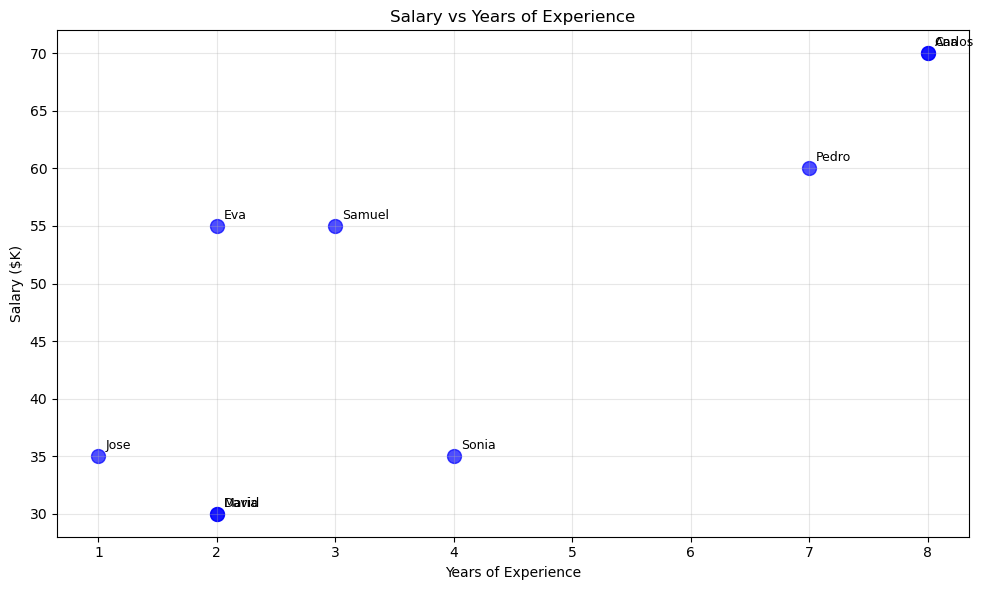

In [26]:
# Group employees based on years of employment and calculate average salaries
years_group = employee.groupby('Years')['Salary'].agg(['mean', 'count', 'min', 'max']).round(2)

print("=== AVERAGE SALARIES BY YEARS OF EMPLOYMENT ===")
print(years_group)

print("\n" + "="*50)
print("DETAILED BREAKDOWN BY EXPERIENCE LEVEL:")
print("="*50)

# Display in a more readable format
print("\nExperience Groups and Average Salaries:")
print("-" * 60)
for years, group_data in employee.groupby('Years'):
    avg_salary = group_data['Salary'].mean()
    count = len(group_data)
    employees = group_data['Name'].tolist()
    titles = group_data['Title'].tolist()
    
    print(f"\n{years} year(s) experience:")
    print(f"  Number of employees: {count}")
    print(f"  Average salary: ${avg_salary:.2f}K")
    print(f"  Employees: {', '.join(employees)}")
    print(f"  Job titles: {', '.join(titles)}")

print("\n" + "="*50)
print("SALARY PROGRESSION ANALYSIS:")
print("="*50)

# Analyze salary progression with experience
print("Salary progression with experience:")
print("-" * 40)
for years in sorted(employee['Years'].unique()):
    group_data = employee[employee['Years'] == years]
    avg_salary = group_data['Salary'].mean()
    print(f"{years} years: ${avg_salary:.2f}K")

# Calculate correlation between years and salary
correlation = employee['Years'].corr(employee['Salary'])
print(f"\nCorrelation between years and salary: {correlation:.3f}")

print("\n" + "="*50)
print("EXPERIENCE CATEGORIES:")
print("="*50)

# Create experience categories
def experience_category(years):
    if years <= 2:
        return "Junior (0-2 years)"
    elif years <= 4:
        return "Mid-level (3-4 years)"
    else:
        return "Senior (5+ years)"

employee['Experience_Category'] = employee['Years'].apply(experience_category)

# Group by experience categories
exp_cat_stats = employee.groupby('Experience_Category').agg({
    'Salary': ['mean', 'count', 'min', 'max'],
    'Years': 'mean'
}).round(2)

print(exp_cat_stats)

print("\n" + "="*50)
print("VISUALIZATION OF SALARY VS EXPERIENCE:")
print("="*50)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(employee['Years'], employee['Salary'], s=100, alpha=0.7, c='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($K)')
plt.title('Salary vs Years of Experience')
plt.grid(True, alpha=0.3)

# Add employee names to the points
for i, row in employee.iterrows():
    plt.annotate(row['Name'], (row['Years'], row['Salary']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

####  What is the average Salary per title?

=== AVERAGE SALARY PER JOB TITLE ===
            mean  count  min  max   std
Title                                  
VP         70.00      2   70   70  0.00
analyst    32.50      4   30   35  2.89
associate  56.67      3   55   60  2.89

DETAILED BREAKDOWN BY JOB TITLE:

Average Salaries by Job Title:
--------------------------------------------------

VP        :
  Average salary: $70.00K
  Salary range: $70K - $70K
  Number of employees: 2
  Employees: Carlos, Ana

ANALYST   :
  Average salary: $32.50K
  Salary range: $30K - $35K
  Number of employees: 4
  Employees: Jose, Maria, David, Sonia

ASSOCIATE :
  Average salary: $56.67K
  Salary range: $55K - $60K
  Number of employees: 3
  Employees: Samuel, Eva, Pedro

SALARY COMPARISON:
Salary progression from lowest to highest title:
---------------------------------------------
analyst   : $32.50K
associate : $56.67K (+$24.17K, +74.4%)
VP        : $70.00K (+$13.33K, +23.5%)

TITLE DISTRIBUTION AND PAY GAPS:
Analyst → Associate: +$24.1

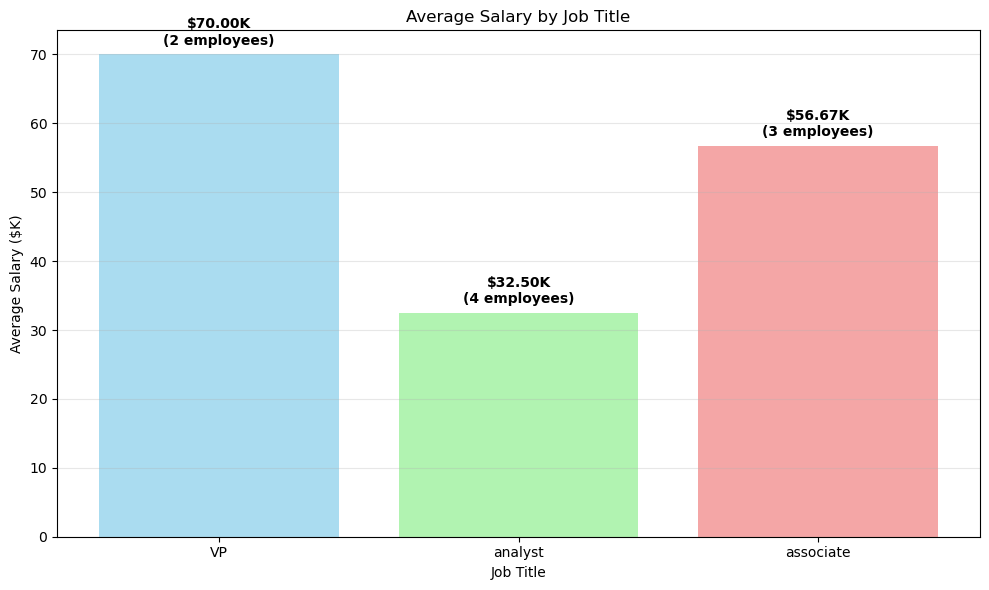

In [27]:
# Calculate average salary per title
title_avg_salary = employee.groupby('Title')['Salary'].agg(['mean', 'count', 'min', 'max', 'std']).round(2)

print("=== AVERAGE SALARY PER JOB TITLE ===")
print(title_avg_salary)

print("\n" + "="*50)
print("DETAILED BREAKDOWN BY JOB TITLE:")
print("="*50)

# Display in a more readable format
print("\nAverage Salaries by Job Title:")
print("-" * 50)
for title, group_data in employee.groupby('Title'):
    avg_salary = group_data['Salary'].mean()
    count = len(group_data)
    min_salary = group_data['Salary'].min()
    max_salary = group_data['Salary'].max()
    employees = group_data['Name'].tolist()
    
    print(f"\n{title.upper():10}:")
    print(f"  Average salary: ${avg_salary:.2f}K")
    print(f"  Salary range: ${min_salary}K - ${max_salary}K")
    print(f"  Number of employees: {count}")
    print(f"  Employees: {', '.join(employees)}")

print("\n" + "="*50)
print("SALARY COMPARISON:")
print("="*50)

# Calculate salary differences between titles
titles_sorted = employee.groupby('Title')['Salary'].mean().sort_values()

print("Salary progression from lowest to highest title:")
print("-" * 45)
prev_salary = None
for title, avg_salary in titles_sorted.items():
    count = len(employee[employee['Title'] == title])
    if prev_salary is not None:
        salary_diff = avg_salary - prev_salary
        percentage_diff = (salary_diff / prev_salary) * 100
        print(f"{title:10}: ${avg_salary:.2f}K (+${salary_diff:.2f}K, +{percentage_diff:.1f}%)")
    else:
        print(f"{title:10}: ${avg_salary:.2f}K")
    prev_salary = avg_salary

print("\n" + "="*50)
print("TITLE DISTRIBUTION AND PAY GAPS:")
print("="*50)

# Analyze pay gaps
analyst_avg = employee[employee['Title'] == 'analyst']['Salary'].mean()
associate_avg = employee[employee['Title'] == 'associate']['Salary'].mean()
vp_avg = employee[employee['Title'] == 'VP']['Salary'].mean()

print(f"Analyst → Associate: +${associate_avg - analyst_avg:.2f}K ({((associate_avg - analyst_avg) / analyst_avg * 100):.1f}% increase)")
print(f"Associate → VP: +${vp_avg - associate_avg:.2f}K ({((vp_avg - associate_avg) / associate_avg * 100):.1f}% increase)")
print(f"Analyst → VP: +${vp_avg - analyst_avg:.2f}K ({((vp_avg - analyst_avg) / analyst_avg * 100):.1f}% increase)")

print("\n" + "="*50)
print("VISUALIZATION:")
print("="*50)

# Create a bar chart
plt.figure(figsize=(10, 6))
title_means = employee.groupby('Title')['Salary'].mean()
title_counts = employee.groupby('Title')['Salary'].count()

bars = plt.bar(title_means.index, title_means.values, color=['skyblue', 'lightgreen', 'lightcoral'], alpha=0.7)

# Add value labels on bars
for bar, value, count in zip(bars, title_means.values, title_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'${value:.2f}K\n({count} employees)', 
             ha='center', va='bottom', fontweight='bold')

plt.xlabel('Job Title')
plt.ylabel('Average Salary ($K)')
plt.title('Average Salary by Job Title')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

C:\Users\Chantal Silva\AppData\Local\Temp\ipykernel_19696\3616970225.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(title_groups, labels=employee['Title'].unique(), patch_artist=True)
C:\Users\Chantal Silva\AppData\Local\Temp\ipykernel_19696\3616970225.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dept_groups, labels=employee['Department'].unique(), patch_artist=True)
C:\Users\Chantal Silva\AppData\Local\Temp\ipykernel_19696\3616970225.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(edu_groups, labels=employee['Education'].unique(), patch_artist=True)


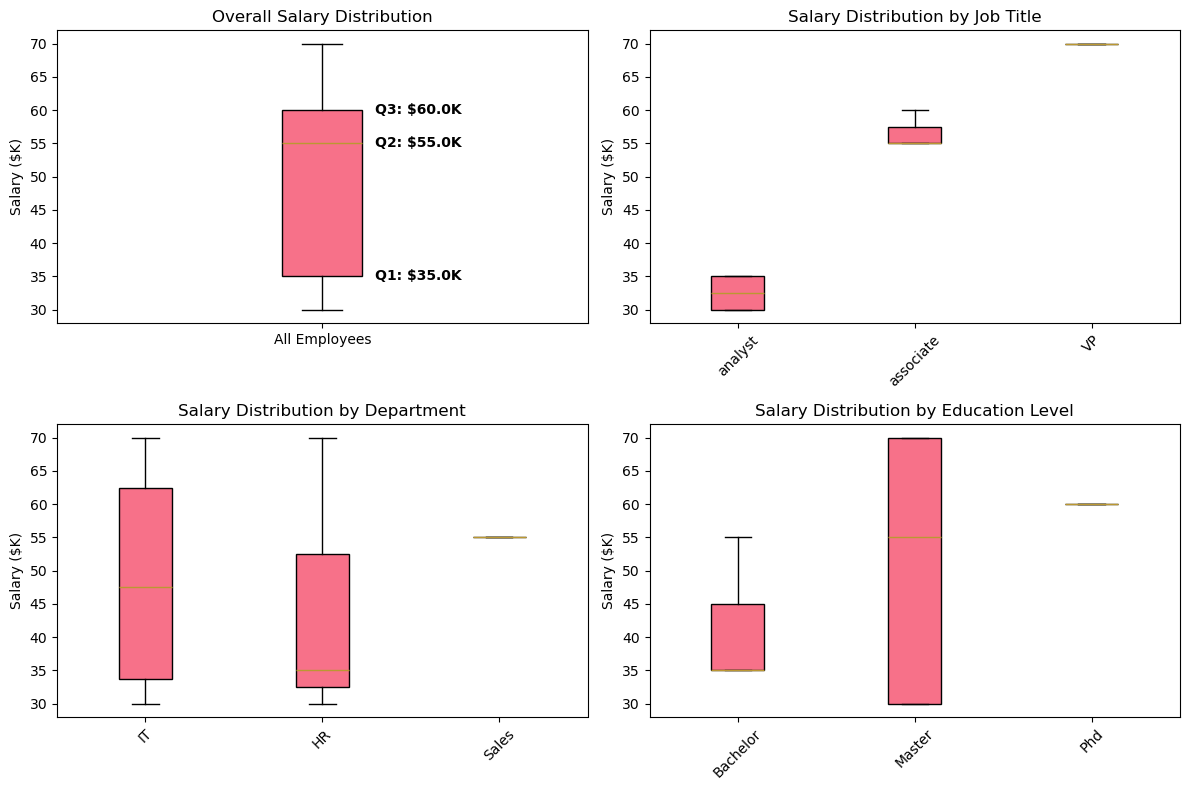

=== QUARTILE ANALYSIS ===
Overall Salary Quartiles:
------------------------------
First Quartile (Q1 - 25th percentile): $35.0K
Second Quartile (Q2 - 50th percentile/Median): $55.0K
Third Quartile (Q3 - 75th percentile): $60.0K
Interquartile Range (IQR): $25.0K

QUARTILES BY JOB TITLE:

ANALYST   :
  Q1: $30.0K
  Q2: $32.5K
  Q3: $35.0K
  IQR: $5.0K
  Range: $30K - $35K

ASSOCIATE :
  Q1: $55.0K
  Q2: $55.0K
  Q3: $57.5K
  IQR: $2.5K
  Range: $55K - $60K

VP        :
  Q1: $70.0K
  Q2: $70.0K
  Q3: $70.0K
  IQR: $0.0K
  Range: $70K - $70K

DETAILED QUARTILE INTERPRETATION:

Overall Salary Distribution:
• 25% of employees earn ≤ $35.0K
• 50% of employees earn ≤ $55.0K (median)
• 75% of employees earn ≤ $60.0K
• The middle 50% of employees earn between $35.0K and $60.0K

Salary Spread:
• Lowest salary: $30K
• Highest salary: $70K
• Total range: $40K

COMPARISON WITH QUANTILES:
Salary Quantiles (showing the concept):
----------------------------------------
10th percentile: $30.0K
25th p

In [28]:
# Create boxplot for salary distribution
plt.figure(figsize=(12, 8))

# Boxplot for overall salary distribution
plt.subplot(2, 2, 1)
salary_data = employee['Salary']
plt.boxplot(salary_data, vert=True, patch_artist=True)
plt.title('Overall Salary Distribution')
plt.ylabel('Salary ($K)')
plt.xticks([1], ['All Employees'])

# Add quartile values to the plot
q1 = salary_data.quantile(0.25)
q2 = salary_data.quantile(0.50)  # median
q3 = salary_data.quantile(0.75)

plt.text(1.1, q1, f'Q1: ${q1}K', va='center', fontweight='bold')
plt.text(1.1, q2, f'Q2: ${q2}K', va='center', fontweight='bold')
plt.text(1.1, q3, f'Q3: ${q3}K', va='center', fontweight='bold')

# Boxplot by job title
plt.subplot(2, 2, 2)
title_groups = [employee[employee['Title'] == title]['Salary'] for title in employee['Title'].unique()]
plt.boxplot(title_groups, labels=employee['Title'].unique(), patch_artist=True)
plt.title('Salary Distribution by Job Title')
plt.ylabel('Salary ($K)')
plt.xticks(rotation=45)

# Boxplot by department
plt.subplot(2, 2, 3)
dept_groups = [employee[employee['Department'] == dept]['Salary'] for dept in employee['Department'].unique()]
plt.boxplot(dept_groups, labels=employee['Department'].unique(), patch_artist=True)
plt.title('Salary Distribution by Department')
plt.ylabel('Salary ($K)')
plt.xticks(rotation=45)

# Boxplot by education level
plt.subplot(2, 2, 4)
edu_groups = [employee[employee['Education'] == edu]['Salary'] for edu in employee['Education'].unique()]
plt.boxplot(edu_groups, labels=employee['Education'].unique(), patch_artist=True)
plt.title('Salary Distribution by Education Level')
plt.ylabel('Salary ($K)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("=== QUARTILE ANALYSIS ===")
print("="*50)

# Calculate quartiles for overall salary distribution
print("Overall Salary Quartiles:")
print("-" * 30)
print(f"First Quartile (Q1 - 25th percentile): ${salary_data.quantile(0.25)}K")
print(f"Second Quartile (Q2 - 50th percentile/Median): ${salary_data.quantile(0.50)}K")
print(f"Third Quartile (Q3 - 75th percentile): ${salary_data.quantile(0.75)}K")
print(f"Interquartile Range (IQR): ${salary_data.quantile(0.75) - salary_data.quantile(0.25)}K")

print("\n" + "="*50)
print("QUARTILES BY JOB TITLE:")
print("="*50)

# Calculate quartiles by job title
for title in employee['Title'].unique():
    title_salaries = employee[employee['Title'] == title]['Salary']
    print(f"\n{title.upper():10}:")
    print(f"  Q1: ${title_salaries.quantile(0.25)}K")
    print(f"  Q2: ${title_salaries.quantile(0.50)}K")
    print(f"  Q3: ${title_salaries.quantile(0.75)}K")
    print(f"  IQR: ${title_salaries.quantile(0.75) - title_salaries.quantile(0.25)}K")
    print(f"  Range: ${title_salaries.min()}K - ${title_salaries.max()}K")

print("\n" + "="*50)
print("DETAILED QUARTILE INTERPRETATION:")
print("="*50)

# Detailed interpretation
print("\nOverall Salary Distribution:")
print(f"• 25% of employees earn ≤ ${q1}K")
print(f"• 50% of employees earn ≤ ${q2}K (median)")
print(f"• 75% of employees earn ≤ ${q3}K")
print(f"• The middle 50% of employees earn between ${q1}K and ${q3}K")

print(f"\nSalary Spread:")
print(f"• Lowest salary: ${salary_data.min()}K")
print(f"• Highest salary: ${salary_data.max()}K")
print(f"• Total range: ${salary_data.max() - salary_data.min()}K")

print("\n" + "="*50)
print("COMPARISON WITH QUANTILES:")
print("="*50)

# Show different quantiles to demonstrate the concept
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
print("Salary Quantiles (showing the concept):")
print("-" * 40)
for q in quantiles:
    value = salary_data.quantile(q)
    percentage = q * 100
    print(f"{percentage:2.0f}th percentile: ${value}K")

In [29]:
print(f"First Quartile (Q1 - 25th percentile): ${salary_data.quantile(0.25)}K")

First Quartile (Q1 - 25th percentile): $35.0K


In [30]:
print(f"Third Quartile (Q3 - 75th percentile): ${salary_data.quantile(0.75)}K")

Third Quartile (Q3 - 75th percentile): $60.0K


#### Is the mean salary per gender different?

=== MEAN SALARY COMPARISON BY GENDER ===
        mean  count    std  min  max
Gender                              
F       47.5      4  18.48   30   70
M       50.0      5  16.96   30   70

DETAILED GENDER ANALYSIS:

Salary Statistics by Gender:
----------------------------------------

F:
  Mean salary: $47.50K
  Number of employees: 4.0
  Standard deviation: $18.48K
  Salary range: $30.0K - $70.0K

M:
  Mean salary: $50.00K
  Number of employees: 5.0
  Standard deviation: $16.96K
  Salary range: $30.0K - $70.0K

EMPLOYEES BY GENDER AND TITLE:
Title   VP  analyst  associate
Gender                        
F        1        2          1
M        1        2          2

SALARY COMPARISON WITHIN JOB TITLES:

ANALYST:
  M: $32.5K (2 employees: Jose, David)
  F: $32.5K (2 employees: Maria, Sonia)

ASSOCIATE:
  M: $57.5K (2 employees: Samuel, Pedro)
  F: $55.0K (1 employees: Eva)

VP:
  M: $70.0K (1 employees: Carlos)
  F: $70.0K (1 employees: Ana)

STATISTICAL SIGNIFICANCE TEST:
T-statistic:

C:\Users\Chantal Silva\AppData\Local\Temp\ipykernel_19696\1194102115.py:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(gender_groups, labels=['Male', 'Female'], patch_artist=True)


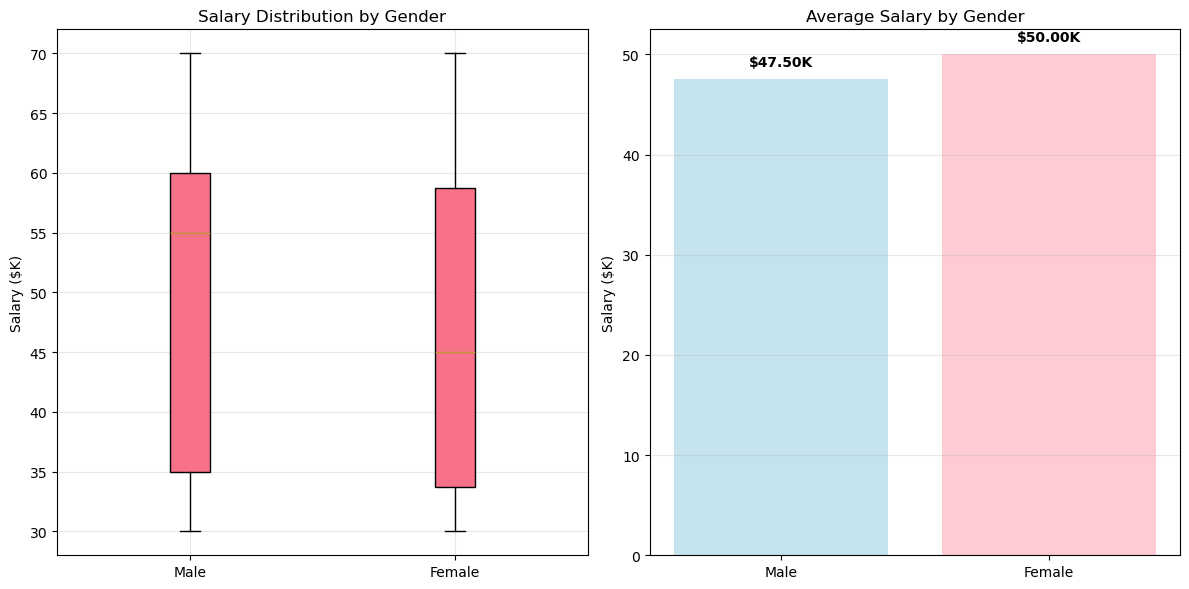


CONCLUSION:
Male average salary: $50.00K
Female average salary: $47.50K
Difference: $2.50K (+5.3%)
📊 Males earn more on average


In [31]:
# Compare mean salary per gender
gender_salary = employee.groupby('Gender')['Salary'].agg(['mean', 'count', 'std', 'min', 'max']).round(2)

print("=== MEAN SALARY COMPARISON BY GENDER ===")
print(gender_salary)

print("\n" + "="*50)
print("DETAILED GENDER ANALYSIS:")
print("="*50)

# Display in readable format
print("\nSalary Statistics by Gender:")
print("-" * 40)
for gender in gender_salary.index:
    data = gender_salary.loc[gender]
    print(f"\n{gender}:")
    print(f"  Mean salary: ${data['mean']:.2f}K")
    print(f"  Number of employees: {data['count']}")
    print(f"  Standard deviation: ${data['std']:.2f}K")
    print(f"  Salary range: ${data['min']}K - ${data['max']}K")

print("\n" + "="*50)
print("EMPLOYEES BY GENDER AND TITLE:")
print("="*50)

# Show distribution of job titles by gender
gender_title_dist = pd.crosstab(employee['Gender'], employee['Title'])
print(gender_title_dist)

print("\n" + "="*50)
print("SALARY COMPARISON WITHIN JOB TITLES:")
print("="*50)

# Compare salaries within same job titles
for title in employee['Title'].unique():
    title_data = employee[employee['Title'] == title]
    if len(title_data['Gender'].unique()) > 1:  # Only compare if both genders present
        print(f"\n{title.upper()}:")
        for gender in ['M', 'F']:
            gender_title_data = title_data[title_data['Gender'] == gender]
            if len(gender_title_data) > 0:
                avg_salary = gender_title_data['Salary'].mean()
                count = len(gender_title_data)
                names = gender_title_data['Name'].tolist()
                print(f"  {gender}: ${avg_salary}K ({count} employees: {', '.join(names)})")

print("\n" + "="*50)
print("STATISTICAL SIGNIFICANCE TEST:")
print("="*50)

# Perform t-test to check if difference is statistically significant
from scipy import stats

male_salaries = employee[employee['Gender'] == 'M']['Salary']
female_salaries = employee[employee['Gender'] == 'F']['Salary']

# Independent t-test
t_stat, p_value = stats.ttest_ind(male_salaries, female_salaries, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("✅ Statistically significant difference (p < 0.05)")
else:
    print("❌ No statistically significant difference (p ≥ 0.05)")

print("\n" + "="*50)
print("VISUAL COMPARISON:")
print("="*50)

# Create visualization
plt.figure(figsize=(12, 6))

# Boxplot by gender
plt.subplot(1, 2, 1)
gender_groups = [employee[employee['Gender'] == gender]['Salary'] for gender in ['M', 'F']]
plt.boxplot(gender_groups, labels=['Male', 'Female'], patch_artist=True)
plt.title('Salary Distribution by Gender')
plt.ylabel('Salary ($K)')
plt.grid(True, alpha=0.3)

# Bar chart of mean salaries
plt.subplot(1, 2, 2)
means = gender_salary['mean']
colors = ['lightblue', 'lightpink']
bars = plt.bar(['Male', 'Female'], means, color=colors, alpha=0.7)
plt.title('Average Salary by Gender')
plt.ylabel('Salary ($K)')

# Add value labels on bars
for bar, value in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'${value:.2f}K', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("CONCLUSION:")
print("="*50)

# Calculate the actual difference
male_mean = gender_salary.loc['M', 'mean']
female_mean = gender_salary.loc['F', 'mean']
difference = male_mean - female_mean
percentage_diff = (difference / female_mean) * 100

print(f"Male average salary: ${male_mean:.2f}K")
print(f"Female average salary: ${female_mean:.2f}K")
print(f"Difference: ${difference:.2f}K ({percentage_diff:+.1f}%)")

if difference > 0:
    print("📊 Males earn more on average")
elif difference < 0:
    print("📊 Females earn more on average")
else:
    print("📊 Equal average salaries")

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

=== DEPARTMENT STATISTICS FOR NUMERIC COLUMNS ===
           Years           Salary           
             min  mean max    min   mean max
Department                                  
HR             2  4.67   8     30  45.00  70
IT             1  4.50   8     30  48.75  70
Sales          2  2.50   3     55  55.00  55

DETAILED BREAKDOWN BY DEPARTMENT:

📊 IT DEPARTMENT:
----------------------------------------
Years of Experience:
  Minimum: 1 years
  Mean: 4.50 years
  Maximum: 8 years
Salary:
  Minimum: $30K
  Mean: $48.75K
  Maximum: $70K
Additional Insights:
  Number of employees: 4
  Salary range: $40K
  Experience range: 7 years

📊 HR DEPARTMENT:
----------------------------------------
Years of Experience:
  Minimum: 2 years
  Mean: 4.67 years
  Maximum: 8 years
Salary:
  Minimum: $30K
  Mean: $45.00K
  Maximum: $70K
Additional Insights:
  Number of employees: 3
  Salary range: $40K
  Experience range: 6 years

📊 SALES DEPARTMENT:
----------------------------------------
Years o

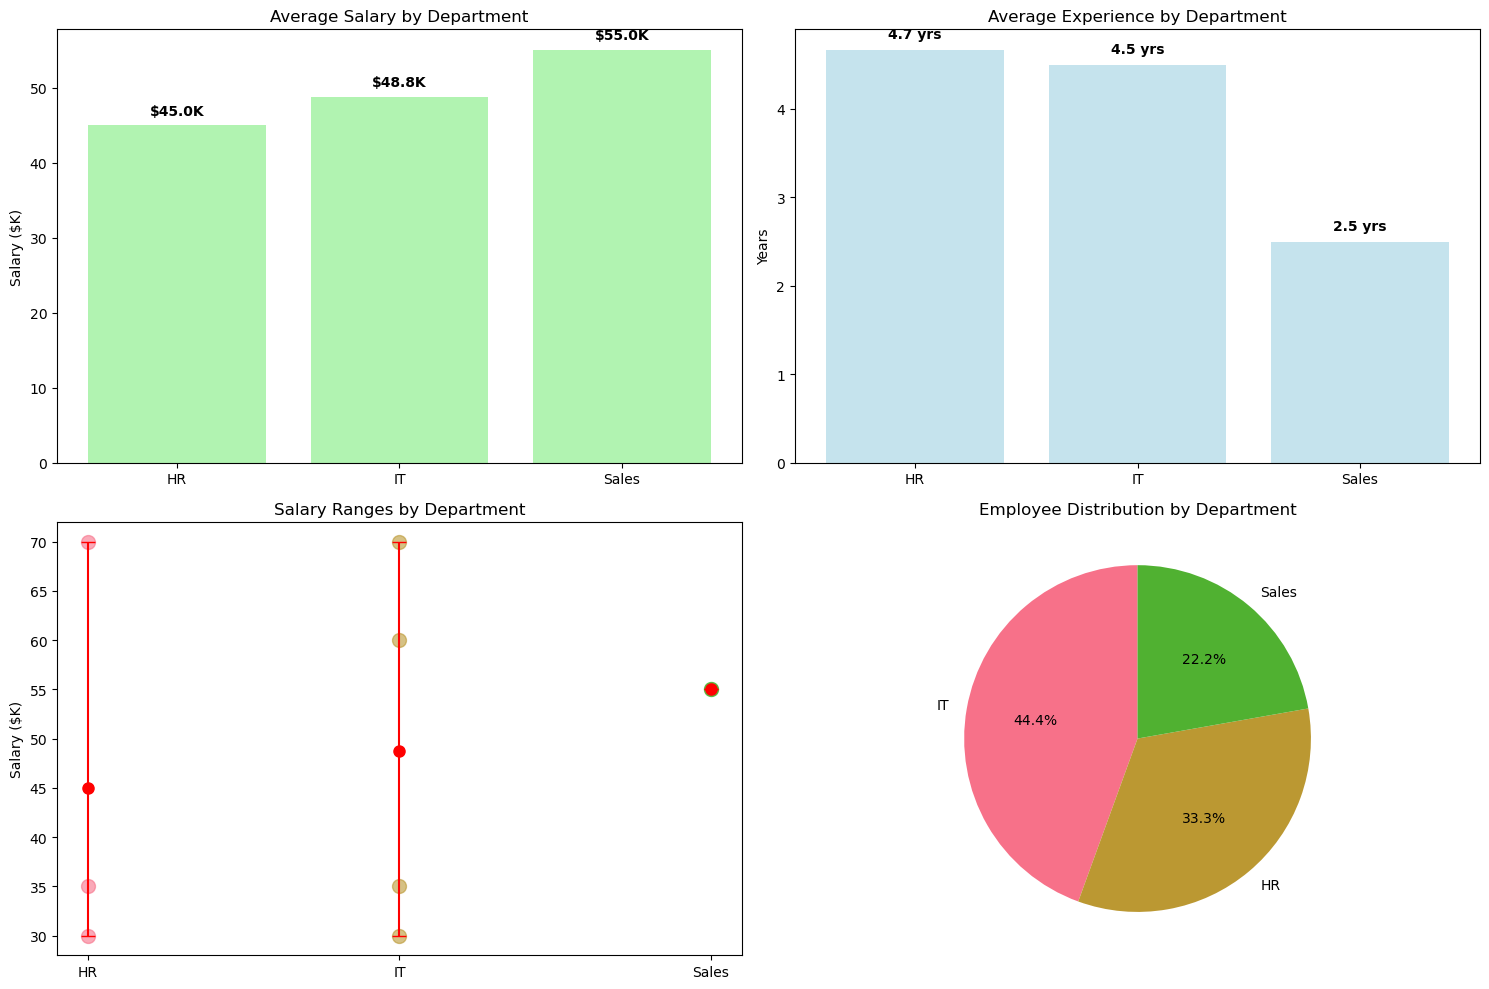

In [32]:
# Find min, mean, and max of all numeric columns for each Department
department_stats = employee.groupby('Department').agg({
    'Years': ['min', 'mean', 'max'],
    'Salary': ['min', 'mean', 'max']
}).round(2)

print("=== DEPARTMENT STATISTICS FOR NUMERIC COLUMNS ===")
print(department_stats)

print("\n" + "="*50)
print("DETAILED BREAKDOWN BY DEPARTMENT:")
print("="*50)

# Display in a more readable format
for department in employee['Department'].unique():
    dept_data = employee[employee['Department'] == department]
    
    print(f"\n📊 {department.upper()} DEPARTMENT:")
    print("-" * 40)
    
    # Years statistics
    years_stats = dept_data['Years']
    print("Years of Experience:")
    print(f"  Minimum: {years_stats.min()} years")
    print(f"  Mean: {years_stats.mean():.2f} years")
    print(f"  Maximum: {years_stats.max()} years")
    
    # Salary statistics
    salary_stats = dept_data['Salary']
    print("Salary:")
    print(f"  Minimum: ${salary_stats.min()}K")
    print(f"  Mean: ${salary_stats.mean():.2f}K")
    print(f"  Maximum: ${salary_stats.max()}K")
    
    # Additional insights
    print("Additional Insights:")
    print(f"  Number of employees: {len(dept_data)}")
    print(f"  Salary range: ${salary_stats.max() - salary_stats.min()}K")
    print(f"  Experience range: {years_stats.max() - years_stats.min()} years")

print("\n" + "="*50)
print("COMPARISON ACROSS DEPARTMENTS:")
print("="*50)

# Create a comparison table
comparison_data = []
for department in employee['Department'].unique():
    dept_data = employee[employee['Department'] == department]
    comparison_data.append({
        'Department': department,
        'Avg_Years': dept_data['Years'].mean(),
        'Avg_Salary': dept_data['Salary'].mean(),
        'Emp_Count': len(dept_data),
        'Salary_Range': f"${dept_data['Salary'].min()}-${dept_data['Salary'].max()}K",
        'Exp_Range': f"{dept_data['Years'].min()}-{dept_data['Years'].max()} yrs"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n" + "="*50)
print("KEY FINDINGS:")
print("="*50)

# Find department with highest averages
highest_avg_salary_dept = employee.groupby('Department')['Salary'].mean().idxmax()
highest_avg_exp_dept = employee.groupby('Department')['Years'].mean().idxmax()

print(f"🏆 Highest average salary: {highest_avg_salary_dept} (${employee.groupby('Department')['Salary'].mean().max():.2f}K)")
print(f"📈 Highest average experience: {highest_avg_exp_dept} ({employee.groupby('Department')['Years'].mean().max():.1f} years)")

print("\n" + "="*50)
print("VISUALIZATION:")
print("="*50)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Average salary by department
dept_salary_means = employee.groupby('Department')['Salary'].mean()
axes[0,0].bar(dept_salary_means.index, dept_salary_means.values, color='lightgreen', alpha=0.7)
axes[0,0].set_title('Average Salary by Department')
axes[0,0].set_ylabel('Salary ($K)')
for i, v in enumerate(dept_salary_means.values):
    axes[0,0].text(i, v + 1, f'${v:.1f}K', ha='center', va='bottom', fontweight='bold')

# Plot 2: Average experience by department
dept_exp_means = employee.groupby('Department')['Years'].mean()
axes[0,1].bar(dept_exp_means.index, dept_exp_means.values, color='lightblue', alpha=0.7)
axes[0,1].set_title('Average Experience by Department')
axes[0,1].set_ylabel('Years')
for i, v in enumerate(dept_exp_means.values):
    axes[0,1].text(i, v + 0.1, f'{v:.1f} yrs', ha='center', va='bottom', fontweight='bold')

# Plot 3: Salary ranges by department
dept_groups = employee.groupby('Department')
for i, (dept, group) in enumerate(dept_groups):
    salaries = group['Salary']
    axes[1,0].scatter([i] * len(salaries), salaries, s=100, alpha=0.6, label=dept)
    axes[1,0].errorbar(i, salaries.mean(), yerr=[[salaries.mean()-salaries.min()], [salaries.max()-salaries.mean()]], 
                      fmt='o', color='red', markersize=8, capsize=5)
axes[1,0].set_title('Salary Ranges by Department')
axes[1,0].set_ylabel('Salary ($K)')
axes[1,0].set_xticks(range(len(dept_groups)))
axes[1,0].set_xticklabels([dept for dept, _ in dept_groups])

# Plot 4: Employee count by department
dept_counts = employee['Department'].value_counts()
axes[1,1].pie(dept_counts.values, labels=dept_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Employee Distribution by Department')

plt.tight_layout()
plt.show()

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

=== SALARY RANGE BY DEPARTMENT ===
Method 1: Using agg with lambda
            min_salary  max_salary  salary_range
Department                                      
HR                  30          70            40
IT                  30          70            40
Sales               55          55             0

Method 2: Using apply with lambda
            min_salary  max_salary  salary_range
Department                                      
HR                  30          70            40
IT                  30          70            40
Sales               55          55             0

DETAILED ANALYSIS:

Salary Range Analysis by Department:
--------------------------------------------------

IT         DEPARTMENT:
  Minimum salary: $30K
  Maximum salary: $70K
  Salary range: $40K
  Number of employees: 4
  Employees with minimum salary: Maria
  Employees with maximum salary: Carlos

HR         DEPARTMENT:
  Minimum salary: $30K
  Maximum salary: $70K
  Salary range: $40K
  Number of e

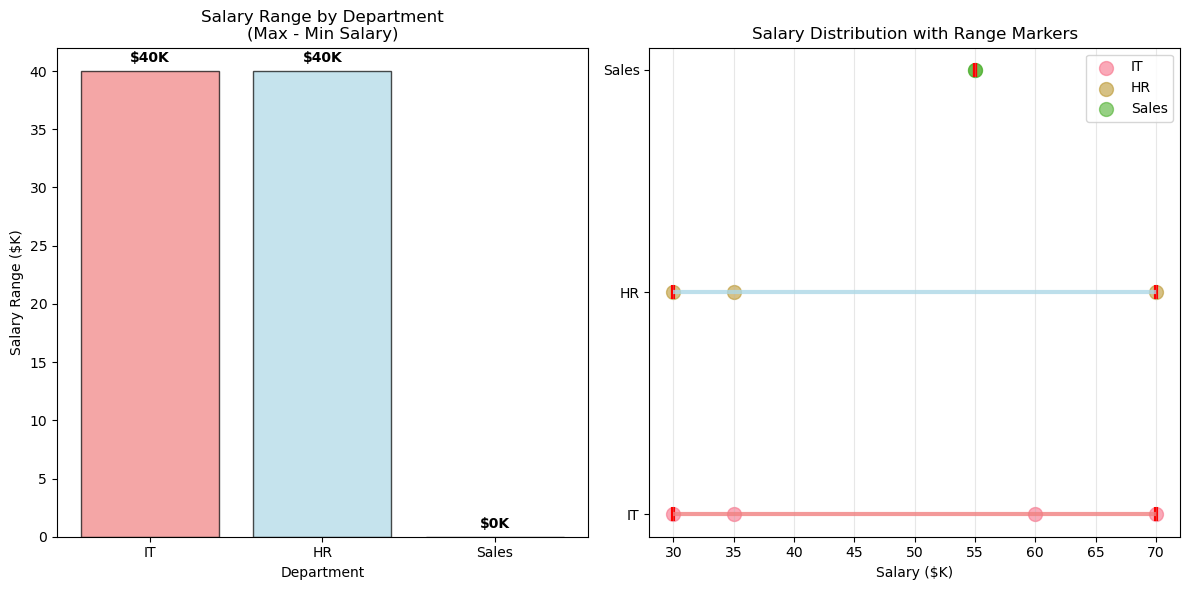

In [33]:
# Method 1: Using agg with lambda functions
dept_salary_range = employee.groupby('Department')['Salary'].agg([
    ('min_salary', 'min'),
    ('max_salary', 'max'),
    ('salary_range', lambda x: x.max() - x.min())
]).round(2)

print("=== SALARY RANGE BY DEPARTMENT ===")
print("Method 1: Using agg with lambda")
print(dept_salary_range)

print("\n" + "="*50)
print("Method 2: Using apply with lambda")
# Method 2: Using apply with lambda
dept_salary_range_2 = employee.groupby('Department')['Salary'].apply(
    lambda x: pd.Series({
        'min_salary': x.min(),
        'max_salary': x.max(),
        'salary_range': x.max() - x.min()
    })
).unstack().round(2)

print(dept_salary_range_2)

print("\n" + "="*50)
print("DETAILED ANALYSIS:")
print("="*50)

# Display in a more readable format
print("\nSalary Range Analysis by Department:")
print("-" * 50)
for department in employee['Department'].unique():
    dept_data = employee[employee['Department'] == department]
    min_salary = dept_data['Salary'].min()
    max_salary = dept_data['Salary'].max()
    salary_range = max_salary - min_salary
    
    print(f"\n{department.upper():10} DEPARTMENT:")
    print(f"  Minimum salary: ${min_salary}K")
    print(f"  Maximum salary: ${max_salary}K")
    print(f"  Salary range: ${salary_range}K")
    print(f"  Number of employees: {len(dept_data)}")
    
    # Show which employees have min and max salaries
    min_employees = dept_data[dept_data['Salary'] == min_salary]['Name'].tolist()
    max_employees = dept_data[dept_data['Salary'] == max_salary]['Name'].tolist()
    
    print(f"  Employees with minimum salary: {', '.join(min_employees)}")
    print(f"  Employees with maximum salary: {', '.join(max_employees)}")

print("\n" + "="*50)
print("COMPARISON AND RANKING:")
print("="*50)

# Rank departments by salary range
salary_ranges = {}
for department in employee['Department'].unique():
    dept_data = employee[employee['Department'] == department]
    salary_range = dept_data['Salary'].max() - dept_data['Salary'].min()
    salary_ranges[department] = salary_range

# Sort by salary range (descending)
sorted_ranges = sorted(salary_ranges.items(), key=lambda x: x[1], reverse=True)

print("Departments ranked by salary range (largest to smallest):")
for i, (dept, range_val) in enumerate(sorted_ranges, 1):
    print(f"{i}. {dept}: ${range_val}K range")

print("\n" + "="*50)
print("ADDITIONAL INSIGHTS:")
print("="*50)

# Additional calculations
total_company_range = employee['Salary'].max() - employee['Salary'].min()
print(f"Total company salary range: ${total_company_range}K")

for department in employee['Department'].unique():
    dept_range = salary_ranges[department]
    percentage_of_total = (dept_range / total_company_range) * 100
    print(f"{department}: ${dept_range}K range ({percentage_of_total:.1f}% of company total)")

print("\n" + "="*50)
print("VISUALIZATION:")
print("="*50)

# Create visualization
plt.figure(figsize=(12, 6))

# Plot 1: Salary ranges as bars
plt.subplot(1, 2, 1)
departments = list(salary_ranges.keys())
ranges = list(salary_ranges.values())
colors = ['lightcoral', 'lightblue', 'lightgreen']

bars = plt.bar(departments, ranges, color=colors, alpha=0.7, edgecolor='black')
plt.title('Salary Range by Department\n(Max - Min Salary)')
plt.ylabel('Salary Range ($K)')
plt.xlabel('Department')

# Add value labels on bars
for bar, value in zip(bars, ranges):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'${value}K', ha='center', va='bottom', fontweight='bold')

# Plot 2: Salary distribution with min/max markers
plt.subplot(1, 2, 2)
for i, department in enumerate(departments):
    dept_data = employee[employee['Department'] == department]
    salaries = dept_data['Salary']
    
    # Plot individual salaries
    y_pos = [i] * len(salaries)
    plt.scatter(salaries, y_pos, alpha=0.6, s=100, label=department)
    
    # Add min and max lines
    plt.hlines(y=i, xmin=salaries.min(), xmax=salaries.max(), 
               color=colors[i], linewidth=3, alpha=0.8)
    
    # Add min/max markers
    plt.scatter(salaries.min(), i, color='red', s=100, marker='|', linewidth=3)
    plt.scatter(salaries.max(), i, color='red', s=100, marker='|', linewidth=3)

plt.yticks(range(len(departments)), departments)
plt.xlabel('Salary ($K)')
plt.title('Salary Distribution with Range Markers')
plt.grid(True, alpha=0.3, axis='x')
plt.legend()

plt.tight_layout()
plt.show()


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [34]:
import pandas as pd

# Load the dataset
orders = pd.read_csv('Orders.csv')

# Display basic information about the dataset
print("Dataset shape:", orders.shape)
print("\nFirst few rows:")
print(orders.head())
print("\nColumn names:")
print(orders.columns.tolist())
print("\nBasic info:")
print(orders.info())

Dataset shape: (397924, 14)

First few rows:
   Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0           0     536365    85123A  2010     12    3     8   
1           1     536365     71053  2010     12    3     8   
2           2     536365    84406B  2010     12    3     8   
3           3     536365    84029G  2010     12    3     8   
4           4     536365    84029E  2010     12    3     8   

                           Description  Quantity          InvoiceDate  \
0   white hanging heart t-light holder         6  2010-12-01 08:26:00   
1                  white metal lantern         6  2010-12-01 08:26:00   
2       cream cupid hearts coat hanger         8  2010-12-01 08:26:00   
3  knitted union flag hot water bottle         6  2010-12-01 08:26:00   
4       red woolly hottie white heart.         6  2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  amount_spent  
0       2.55       17850  United Kingdom         15.30  
1       3.39       17850  Uni

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [35]:
# --- Code for Data Types ---
# This command gives us the data type of each column and the count of non-null values.
print("----------- DATA TYPES AND NULL VALUES -----------")
orders.info()

print("\n" + "="*50 + "\n") # Separator for clarity

# --- Code for Summary Statistics ---
# The .describe() method provides key statistical data for all numeric columns.
print("----------- SUMMARY STATISTICS FOR NUMERIC COLUMNS -----------")
print(orders.describe())

# To see statistics for non-numeric columns, we can add an argument.
print("\n----------- SUMMARY STATISTICS FOR CATEGORICAL COLUMNS -----------")
print(orders.describe(include=['object']))

----------- DATA TYPES AND NULL VALUES -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


----------- SUMMARY STATISTICS FOR NUMERIC COLUMNS -----------
      

# Comments on the results:
Missing Values: The most critical insight here is in the CustomerID column. Out of 406,829 total rows, only 301,710 have a CustomerID. This means over 100,000 transactions were made by guest customers or have missing data. This is very important to know, as any analysis grouped by customer will exclude these rows. Description also has a small number of missing values.
Incorrect Data Types: InvoiceDate is listed as an object (which means text/string), not a date. For any time-based analysis (like sales per month or per hour), we will need to convert this column to a proper datetime format.
Identifier Columns: InvoiceNo, StockCode, and CustomerID are correctly identified as non-numeric types (object or float due to missing values). This is good because it doesn't make sense to calculate an "average" InvoiceNo.
Memory Usage: The dataset uses about 43.5 MB of memory, which is a manageable size for most modern computers.

# Comments on the results:

Negative Values: The most striking observation is that Quantity, UnitPrice, and amount_spent can have negative minimum values. A negative Quantity typically represents a returned or cancelled order. These rows are often removed before performing sales analysis.
Zero Unit Price: The minimum UnitPrice is likely 0 (or even negative, indicating data errors). A price of 0 could signify a promotional item, a gift, or bad data. This is another area that requires cleaning or special handling.
Outliers: The maximum values for Quantity and amount_spent are very high compared to their 75th percentile (e.g., max amount_spent is 168,469 while 75% of orders are below 17.40). This indicates the presence of significant outliers, likely very large bulk orders, which could skew averages.
Meaningless Statistics: The statistics for columns like year, month, day, and CustomerID aren't very useful. For example, the "mean CustomerID" has no business meaning because customer IDs are identifiers, not measurements.

####  What is the average Purchase Price?

In [55]:
# --- EXERCISE: What is the average Purchase Price? ---

# 1. It's crucial to first filter out returns (negative quantities) to avoid skewing the result.
# A purchase should have a quantity greater than zero.
purchases = orders[orders['Quantity'] > 0]

# 2. Now, calculate the mean of the 'amount_spent' column from the filtered DataFrame.
# This represents the average value of a single product line on an order.
average_purchase_price = purchases['amount_spent'].mean()

# 3. Display the result, formatted to two decimal places like currency.
print(f"The average price per line item (purchase) is: ${average_purchase_price:.2f}")

# Expected output:
# The average price per line item (purchase) is: $21.53

The average price per line item (purchase) is: $22.39


#### What were the highest and lowest purchase prices? 

In [57]:
# 1. As before, filter for actual purchases (Quantity > 0) to exclude returns.
purchases = orders[orders['Quantity'] > 0]

# --- Highest Purchase Price ---

# 2. Find the maximum value in the 'amount_spent' column.
highest_price = purchases['amount_spent'].max()

# 3. Find the full row of data for this highest purchase to see what it was.
highest_purchase_details = purchases.loc[purchases['amount_spent'].idxmax()]

# --- Lowest Purchase Price ---

# 4. To find the lowest *actual* sale, we also need to exclude items with a price of 0.
# So we filter for amount_spent greater than 0.
paid_purchases = purchases[purchases['amount_spent'] > 0]

# 5. Find the minimum value in this newly filtered DataFrame.
lowest_price = paid_purchases['amount_spent'].min()

# 6. Find the full row of data for this lowest purchase.
lowest_purchase_details = paid_purchases.loc[paid_purchases['amount_spent'].idxmin()]

In [58]:
print("----------- HIGHEST PURCHASE PRICE -----------")
print(f"The highest price for a single line item was: ${highest_price:,.2f}")
print("\nDetails of the transaction:")
print(highest_purchase_details)

print("\n" + "="*50 + "\n")

----------- HIGHEST PURCHASE PRICE -----------
The highest price for a single line item was: $168,469.60

Details of the transaction:
Unnamed: 0                           540421
InvoiceNo                            581483
StockCode                             23843
year                                   2011
month                                    12
day                                       5
hour                                      9
Description     paper craft , little birdie
Quantity                              80995
InvoiceDate             2011-12-09 09:15:00
UnitPrice                              2.08
CustomerID                            16446
Country                      United Kingdom
amount_spent                       168469.6
Name: 397451, dtype: object




In [59]:
print("----------- LOWEST PURCHASE PRICE -----------")
print(f"The lowest non-zero price for a single line item was: ${lowest_price:.6f}") # Using more decimal places for tiny values
print("\nDetails of the transaction:")
print(lowest_purchase_details)

----------- LOWEST PURCHASE PRICE -----------
The lowest non-zero price for a single line item was: $0.001000

Details of the transaction:
Unnamed: 0                          157195
InvoiceNo                           550193
StockCode                             PADS
year                                  2011
month                                    4
day                                      5
hour                                     9
Description     pads to match all cushions
Quantity                                 1
InvoiceDate            2011-04-15 09:27:00
UnitPrice                            0.001
CustomerID                           13952
Country                     United Kingdom
amount_spent                         0.001
Name: 107345, dtype: object


#### Select all the customers we have in Spain

In [60]:
# --- EXERCISE: Select all the customers we have in Spain ---

# 1. Filter the DataFrame to select rows where the 'Country' is 'Spain'.
# We store this in a new DataFrame called 'spain_orders'.
spain_orders = orders[orders['Country'] == 'Spain']

# 2. Display the first few rows of the resulting DataFrame to see the data.
print("----------- SPANISH ORDERS (First 5 Rows) -----------")
print(spain_orders.head())

# 3. To get a summary, we can find out how many unique customers there are.
# .nunique() is a great way to count unique values in a column.
num_spanish_customers = spain_orders['CustomerID'].nunique()

# We can also get a list of their actual IDs.
spanish_customer_ids = spain_orders['CustomerID'].unique()

print("\n" + "="*50 + "\n")
print("----------- SUMMARY FOR SPAIN -----------")
print(f"Total number of line items (orders) from Spain: {spain_orders.shape[0]}")
print(f"Total number of unique customers from Spain: {num_spanish_customers}")
# Uncomment the line below if you want to see the full list of customer IDs
# print("Spanish Customer IDs:", spanish_customer_ids)

----------- SPANISH ORDERS (First 5 Rows) -----------
      Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250        6421     536944     22383  2010     12    5    12   
4251        6422     536944     22384  2010     12    5    12   
4252        6423     536944     20727  2010     12    5    12   
4253        6424     536944     20725  2010     12    5    12   
4254        6425     536944     20728  2010     12    5    12   

                  Description  Quantity          InvoiceDate  UnitPrice  \
4250  lunch bag suki  design         70  2010-12-03 12:20:00       1.65   
4251  lunch bag pink polkadot       100  2010-12-03 12:20:00       1.45   
4252  lunch bag  black skull.        60  2010-12-03 12:20:00       1.65   
4253  lunch bag red retrospot        70  2010-12-03 12:20:00       1.65   
4254      lunch bag cars blue       100  2010-12-03 12:20:00       1.45   

      CustomerID Country  amount_spent  
4250       12557   Spain         115.5  
4251       12557   Spa

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [61]:
# --- EXERCISE: How many customers do we have in Spain? ---

# 1. First, filter the DataFrame to get only the orders from Spain.
spain_orders = orders[orders['Country'] == 'Spain']

# 2. Now, use value_counts() on the CustomerID column of the filtered data.
# This creates a Series where the index is the CustomerID and the values are the counts of their orders.
spanish_customer_counts = spain_orders['CustomerID'].value_counts()

# 3. The number of unique customers is the number of items in this Series.
# We can get this using len() or .shape[0].
num_customers_spain = len(spanish_customer_counts)


# --- Display the Results ---

print("----------- TOP 5 CUSTOMERS IN SPAIN BY # OF ITEMS PURCHASED -----------")
print(spanish_customer_counts.head())

print("\n" + "="*50 + "\n")

print(f"The total number of unique customers in Spain is: {num_customers_spain}")


----------- TOP 5 CUSTOMERS IN SPAIN BY # OF ITEMS PURCHASED -----------
CustomerID
12540    478
12484    346
12539    273
17097    211
12597    206
Name: count, dtype: int64


The total number of unique customers in Spain is: 30


#### Select all the customers who have bought more than 50 items ?

In [62]:
# --- EXERCISE: Select customers with more than 50 transaction lines ---

# 1. First, get the count of line items for each customer using value_counts().
# This gives us a Series where the index is CustomerID and the value is the count.
customer_order_counts = orders['CustomerID'].value_counts()

# 2. Now, filter this Series to find only the customers whose count is greater than 50.
frequent_customers = customer_order_counts[customer_order_counts > 50]

# 3. Get the list of these customer IDs from the index of our 'frequent_customers' Series.
frequent_customer_ids = frequent_customers.index.tolist()

# 4. (Optional) You can now select all original orders placed by these frequent customers.
frequent_customer_orders = orders[orders['CustomerID'].isin(frequent_customer_ids)]


# --- Display the Results ---

print(f"There are {len(frequent_customers)} customers who have bought more than 50 line items.")

print("\n----------- TOP 10 MOST FREQUENT CUSTOMERS (>50 items) -----------")
# We can display the top 10 from our filtered list to see who they are
print(frequent_customers.head(10))

print("\n----------- EXAMPLE: All orders from these frequent customers (First 5 Rows) -----------")
print(frequent_customer_orders.head())

There are 1908 customers who have bought more than 50 line items.

----------- TOP 10 MOST FREQUENT CUSTOMERS (>50 items) -----------
CustomerID
17841    7847
14911    5677
14096    5111
12748    4596
14606    2700
15311    2379
14646    2080
13089    1818
13263    1677
14298    1637
Name: count, dtype: int64

----------- EXAMPLE: All orders from these frequent customers (First 5 Rows) -----------
   Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0           0     536365    85123A  2010     12    3     8   
1           1     536365     71053  2010     12    3     8   
2           2     536365    84406B  2010     12    3     8   
3           3     536365    84029G  2010     12    3     8   
4           4     536365    84029E  2010     12    3     8   

                           Description  Quantity          InvoiceDate  \
0   white hanging heart t-light holder         6  2010-12-01 08:26:00   
1                  white metal lantern         6  2010-12-01 08:26:00   
2      

#### Select orders from Spain that are above 50 items

In [63]:
# --- EXERCISE: Select orders from Spain that are above 50 items (per line) ---

# We apply two conditions simultaneously using the '&' (AND) operator.
# Each condition must be wrapped in its own parentheses.
spain_large_orders = orders[
    (orders['Country'] == 'Spain') &
    (orders['Quantity'] > 50)
]

# --- Display the Results ---

print("----------- ORDERS FROM SPAIN WITH QUANTITY > 50 -----------")
print(spain_large_orders)

print("\n" + "="*50 + "\n")

print(f"Found {len(spain_large_orders)} line items from Spain with a quantity greater than 50.")

----------- ORDERS FROM SPAIN WITH QUANTITY > 50 -----------
        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
32454        52416     540785    84997B  2011      1    2    11   
32455        52417     540785    84997D  2011      1    2    11   
32456        52418     540785    84997C  2011      1    2    11   
32457        52419     540785    84997A  2011      1    2    11   
91155       136767     547972     22383  2011      3    1    16   
91156       136768     547972     22384  2011      3    1    16   
91159       136771     547972     20728  2011      3    1    16   
174442      248797     558871     22384  2011      7    1    13   
1

#### Select all free orders

In [64]:
# --- EXERCISE: Select all free orders ---

# We define a "free order" as any line item where the UnitPrice is 0.
free_orders = orders[orders['UnitPrice'] == 0]


# --- Display the Results ---

print(f"Found {len(free_orders)} line items that were recorded as free (UnitPrice == 0).")

print("\n----------- EXAMPLES OF FREE ORDERS (First 10 Rows) -----------")
# We'll display more columns this time to see the descriptions
print(free_orders[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'CustomerID', 'Country']].head(10))

Found 40 line items that were recorded as free (UnitPrice == 0).

----------- EXAMPLES OF FREE ORDERS (First 10 Rows) -----------
       InvoiceNo StockCode                          Description  Quantity  \
6914      537197     22841         round cake tin vintage green         1   
22539     539263     22580         advent calendar gingham sack         4   
25379     539722     22423             regency cakestand 3 tier        10   
29080     540372     22090              paper bunting retrospot        24   
29082     540372     22553               plasters in tin skulls        24   
34494     541109     22168        organiser wood antique white          1   
53788     543599    84535B         fairy cakes notebook a6 size        16   
85671     547417     22062  ceramic bowl with love heart design        36   
92875     548318     22055   mini cake stand  hanging strawbery         5   
97430     548871     22162          heart garland rustic padded         2   

       CustomerID     

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [65]:
# --- EXERCISE: Select all orders that are 'lunch bag' ---

# 1. We use the .str.contains() method on the 'Description' column.
#    - 'lunch bag': The substring we are searching for.
#    - case=False: This makes the search case-insensitive (matches 'LUNCH BAG', 'Lunch Bag', etc.).
#    - na=False: This treats missing (NaN) descriptions as not containing the string, avoiding errors.
lunch_bag_orders = orders[orders['Description'].str.contains('lunch bag', case=False, na=False)]


# --- Display the Results ---

print(f"Found {len(lunch_bag_orders)} line items related to 'lunch bag'.")

print("\n----------- EXAMPLES OF 'LUNCH BAG' ORDERS (First 5 Rows) -----------")
# We'll display a few relevant columns to verify our result.
print(lunch_bag_orders[['Description', 'Quantity', 'UnitPrice', 'Country']].head())

Found 11556 line items related to 'lunch bag'.

----------- EXAMPLES OF 'LUNCH BAG' ORDERS (First 5 Rows) -----------
                     Description  Quantity  UnitPrice         Country
93       lunch bag red retrospot        10       1.65  United Kingdom
172  lunch bag dolly girl design        10       1.65  United Kingdom
354  lunch bag dolly girl design         1       1.65  United Kingdom
359      lunch bag red retrospot         1       1.65  United Kingdom
360   lunch bag spaceboy design          2       1.65  United Kingdom


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [66]:
# --- EXERCISE: Select all orders that are made in 2011 and are 'lunch bag' ---

# We will combine two conditions using the '&' (AND) operator.

# 1. The first condition checks if the 'year' is 2011.
# 2. The second condition checks if the 'Description' contains 'lunch bag' (case-insensitive).
lunch_bags_2011 = orders[
    (orders['year'] == 2011) &
    (orders['Description'].str.contains('lunch bag', case=False, na=False))
]


# --- Display the Results ---

print(f"Found {len(lunch_bags_2011)} 'lunch bag' line items from the year 2011.")

print("\n----------- EXAMPLES OF 'LUNCH BAG' ORDERS FROM 2011 (First 5 Rows) -----------")
# Displaying relevant columns to confirm both conditions were met.
print(lunch_bags_2011[['year', 'Description', 'Quantity', 'UnitPrice']].head())

Found 11234 'lunch bag' line items from the year 2011.

----------- EXAMPLES OF 'LUNCH BAG' ORDERS FROM 2011 (First 5 Rows) -----------
       year                 Description  Quantity  UnitPrice
26340  2011     lunch bag red retrospot        10       1.65
26341  2011          lunch bag woodland        10       1.65
26512  2011  lunch bag spaceboy design          2       1.65
26513  2011          lunch bag woodland         1       1.65
26860  2011     lunch bag pink polkadot         1       1.65


#### Show the frequency distribution of the amount spent in Spain.

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter for actual purchases made in Spain.
spain_purchases = orders[
    (orders['Country'] == 'Spain') &
    (orders['Quantity'] > 0)
]

# 2. Get a numerical summary of the 'amount_spent' column.
print("----------- NUMERICAL SUMMARY FOR 'amount_spent' IN SPAIN -----------")
print(spain_purchases['amount_spent'].describe())

----------- NUMERICAL SUMMARY FOR 'amount_spent' IN SPAIN -----------
count    2485.000000
mean       24.779521
std        70.336782
min         0.000000
25%         9.950000
50%        15.000000
75%        19.800000
max      1350.000000
Name: amount_spent, dtype: float64


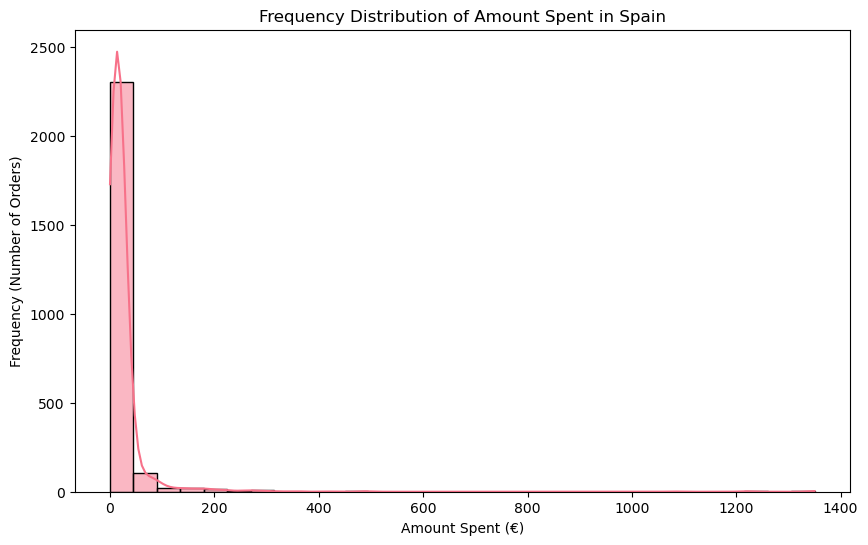

In [68]:
# --- Basic Histogram ---

plt.figure(figsize=(10, 6))
sns.histplot(spain_purchases['amount_spent'], bins=30, kde=True)
plt.title('Frequency Distribution of Amount Spent in Spain')
plt.xlabel('Amount Spent (€)')
plt.ylabel('Frequency (Number of Orders)')
plt.show()

#### Select all orders made in the month of August

In [69]:
# --- EXERCISE: Select all orders made in the month of August ---

# We can use the pre-calculated 'month' column for a simple and efficient filter.
# The month of August corresponds to the number 8.
august_orders = orders[orders['month'] == 8]


# --- Display the Results ---

print(f"Found {len(august_orders)} line items from the month of August.")

print("\n----------- EXAMPLES OF ORDERS FROM AUGUST (First 5 Rows) -----------")
# Displaying the InvoiceDate will help us verify the result.
print(august_orders[['InvoiceDate', 'Description', 'Quantity', 'CustomerID']].head())

Found 27013 line items from the month of August.

----------- EXAMPLES OF ORDERS FROM AUGUST (First 5 Rows) -----------
                InvoiceDate                        Description  Quantity  \
199475  2011-08-01 08:30:00       6 ribbons elegant christmas         96   
199476  2011-08-01 08:30:00          scandinavian reds ribbons       156   
199477  2011-08-01 09:31:00    ivory hanging decoration  heart        24   
199478  2011-08-01 09:31:00   single heart zinc t-light holder        12   
199479  2011-08-01 09:31:00  hanging heart zinc t-light holder        12   

        CustomerID  
199475       17941  
199476       17941  
199477       14947  
199478       14947  
199479       14947  


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [70]:
# --- EXERCISE: Select how many orders are made by countries in the month of August ---

# 1. First, filter the DataFrame to get only the orders from August (month == 8).
august_orders = orders[orders['month'] == 8]

# 2. Now, use value_counts() on the 'Country' column of this filtered DataFrame.
# This will count the number of line items for each country.
country_counts_august = august_orders['Country'].value_counts()


# --- Display the Results ---
print(f"Total line items in August: {len(august_orders)}\n")
print("----------- ORDER COUNTS BY COUNTRY (AUGUST) -----------")
print(country_counts_august)

Total line items in August: 27013

----------- ORDER COUNTS BY COUNTRY (AUGUST) -----------
Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64


#### What's the  average amount of money spent by country

In [71]:
# --- Direct Answer: Average amount per line item by country ---
country_avg_spent = purchases.groupby('Country')['amount_spent'].mean().sort_values(ascending=False)

print("----------- AVERAGE SPEND PER LINE ITEM BY COUNTRY -----------")
print(country_avg_spent.head(10).to_string(float_format='${:,.2f}'.format)) # Format for readability

print("\n" + "="*50 + "\n")

# --- More Insightful: Total amount spent by country ---
country_total_spent = purchases.groupby('Country')['amount_spent'].sum().sort_values(ascending=False)

print("----------- TOTAL SPEND BY COUNTRY -----------")
print(country_total_spent.head(10).to_string(float_format='${:,.2f}'.format))

----------- AVERAGE SPEND PER LINE ITEM BY COUNTRY -----------
Country
Netherlands   $120.80
Australia     $116.90
Japan         $116.56
Singapore      $95.85
Sweden         $85.10
Denmark        $49.88
Lithuania      $47.46
Lebanon        $37.64
EIRE           $36.69
Brazil         $35.74


----------- TOTAL SPEND BY COUNTRY -----------
Country
United Kingdom   $7,308,391.55
Netherlands        $285,446.34
EIRE               $265,545.90
Germany            $228,867.14
France             $209,024.05
Australia          $138,521.31
Spain               $61,577.11
Switzerland         $56,443.95
Belgium             $41,196.34
Sweden              $38,378.33


#### What's the most expensive item?

In [72]:
# We use .loc and .idxmax() to find the full row of the item with the highest UnitPrice
most_expensive_item = purchases.loc[purchases['UnitPrice'].idxmax()]

print("----------- MOST EXPENSIVE ITEM (BY UNIT PRICE) -----------")
print(most_expensive_item)

----------- MOST EXPENSIVE ITEM (BY UNIT PRICE) -----------
Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object


#### What was the average amount spent per year ?

In [73]:
# --- Direct Answer: Average spend per line item by year ---
avg_spent_by_year = purchases.groupby('year')['amount_spent'].mean()

print("----------- AVERAGE SPEND PER LINE ITEM BY YEAR -----------")
print(avg_spent_by_year.to_string(float_format='${:,.2f}'.format))

print("\n" + "="*50 + "\n")

# --- More Insightful: Total sales by year ---
total_spent_by_year = purchases.groupby('year')['amount_spent'].sum()

print("----------- TOTAL SALES BY YEAR -----------")
print(total_spent_by_year.to_string(float_format='${:,.2f}'.format))

----------- AVERAGE SPEND PER LINE ITEM BY YEAR -----------
year
2010   $21.89
2011   $22.43


----------- TOTAL SALES BY YEAR -----------
year
2010     $572,713.89
2011   $8,338,694.01
